In [2]:
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import OneHotEncoder
from tensorflow import feature_column
from tensorflow import estimator


from sklearn.model_selection import train_test_split
from keras.layers import Input, Dense, Flatten, Concatenate, concatenate, Dropout, Lambda
from keras.models import Model
from keras.layers.embeddings import Embedding
from tqdm import tqdm
import shap
from tensorflow.python.types import core as core_tf_types
from datetime import timedelta
from scipy.stats import zscore
from scipy import stats
import matplotlib.pyplot as plt
# from kerashypetune import KerasGridSearch
# from sklearn.inspection import permutation_importance
# from sklearn import inspection

import matplotlib.pyplot as plt
import seaborn as sns

import shap
# import tensorflow.keras.backend 

In [4]:
dataframe =pd.read_csv(r"C:\Users\natha\OneDrive\Documents\lc_loan.csv", 
                  dtype={'id': 'int', 
                       'member_id': 'int', 
                       'loan_amnt': 'float', 
                       'funded_amnt': 'float', 
                       'funded_amnt_inv': 'float', 
                       'term': 'str', 
                       'installment': 'float', 
                       'grade': 'str', 
                       'sub_grade': 'str', 
                        'emp_title': 'str', 
                       'emp_length': 'str', 
                       'home_ownership': 'str', 
                       'annual_inc': 'float', 
                       'verification_status': 'str', 
                       'issue_d': 'str', 
                       'loan_status': 'str', 
                       'pymnt_plan': 'str', 
                       'desc': 'str', 
                       'purpose': 'str', 
                       'title': 'str', 
                       'zip_code': 'str', 
                       'addr_state': 'str', 
                       'dti': 'float', 
                       'delinq_2yrs': 'float', 
                       'earliest_cr_line': 'str', 
                       'inq_last_6mths': 'float', 
                       'mths_since_last_delinq': 'float', 
                       'mths_since_last_record': 'float', 
                       'open_acc': 'float', 
                       'pub_rec': 'float', 
                       'revol_bal': 'float', 
                       'revol_util': 'float', 
                       'total_acc': 'float', 
                       'initial_list_status': 'str', 
                       'out_prncp': 'float', 
                       'out_prncp_inv': 'float', 
                       'total_pymnt': 'float', 
                       'total_pymnt_inv': 'float', 
                       'total_rec_prncp': 'float', 
                       'total_rec_int': 'float', 
                       'total_rec_late_fee': 'float', 
                       'recoveries': 'float', 
                       'collection_recovery_fee': 'float', 
                       'last_pymnt_d': 'str', 
                       'last_pymnt_amnt': 'float', 
                       'next_pymnt_d': 'str', 
                       'last_credit_pull_d': 'str', 
                       'collections_12_mths_ex_med': 'float', 
                       'mths_since_last_major_derog': 'float', 
                       'policy_code': 'float', 
                       'application_type': 'str', 
                       'annual_inc_joint': 'float', 
                       'dti_joint': 'float', 
                       'verification_status_joint': 'str', 
                       'acc_now_delinq': 'float', 
                       'tot_coll_amt': 'float', 
                       'tot_cur_bal': 'float', 
                       'open_acc_6m': 'float', 
                       'open_il_12m': 'float', 
                       'open_il_24m': 'float', 
                       'mths_since_rcnt_il': 'float',
                        'total_bal_il': 'float', 
                       'il_util': 'float', 
                       'open_rv_12m': 'float', 
                       'open_rv_24m': 'float', 
                       'max_bal_bc': 'float', 
                       'all_util': 'float', 
                       'total_rev_hi_lim': 'float', 
                       'inq_fi': 'float', 
                       'total_cu_tl': 'float', 
                       'inq_last_12m': 'float'})
# train=pd.read_csv(r"C:\Users\natha\OneDrive\Documents\lc_loan.csv")
# train



In [60]:
# identify variables with high (>50%) missing values

percent_missing = dataframe.isnull().sum() * 100 / len(dataframe)
missing_value_df = pd.DataFrame({'column_name': dataframe.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)
# missing_value_df

In [7]:
# remove variables with >50% missing

high_miss=[
    'mths_since_last_delinq',
    'mths_since_last_major_derog',
    'mths_since_last_record',
    'desc',
    'inq_last_12m',
    'inq_fi',
    'open_acc_6m',
    'open_il_6m',
    'open_il_12m',
    'open_il_24m',
    'total_bal_il',
    'total_cu_tl',
    'open_rv_12m',
    'open_rv_24m',
    'max_bal_bc',
    'all_util',
    'mths_since_rcnt_il',
    'il_util',
    'annual_inc_joint',
    'verification_status_joint',
    'dti_joint'
]

dataframe=dataframe.drop(high_miss,axis=1)
len(high_miss)

21

In [8]:
# Recode dependent variable to binary

dataframe['co'] = np.where(dataframe['loan_status'] == "Charged Off", 1, 0)
dataframe=dataframe.drop(['loan_status'],axis=1)


In [9]:
# format numeric variables

dataframe['term']=dataframe['term'].str.rstrip(' Monthsm')
dataframe['term']=pd.Series(dataframe['term'], dtype="float")

dataframe['emp_length']=dataframe['emp_length'].str.strip(' Years < > + y')
dataframe['emp_length']=pd.Series(dataframe['emp_length'], dtype="float")

# drop unused variables

d=['id',
   'title',
   'member_id',
   'url',
  'emp_title']

dataframe=dataframe.drop(d,axis=1)
# dataframe['emp_length']

In [2]:

cat_vars=[
    'grade',
    'sub_grade',
    'emp_title',
    'emp_length',
    'home_ownership',
    'verification_status',
    'pymnt_plan',
    'purpose',
    'zip_code',
    'addr_state',
    'initial_list_status',
    'application_type'
]

# for i in cat_vars:
#     dataframe[i] = dataframe[i].astype("str")
    
# print(dataframe.dtypes)


In [10]:
# convert date variables to numeric

date_vars=[
    'issue_d',
    'earliest_cr_line',
    'last_pymnt_d',
    'next_pymnt_d',
    'last_credit_pull_d'
]

for i in date_vars:
    dataframe[i]=pd.to_datetime(dataframe[i])
#     dataframe[i]=pd.to_timedelta(dataframe[i]).dt.total_seconds()
    dataframe[i]=pd.to_numeric(dataframe[i], downcast='float')
    
# print(dataframe.dtypes)


In [12]:
numeric_column_names=['loan_amnt',
                'funded_amnt',
                'funded_amnt_inv',
                'int_rate',
                'installment',
                'annual_inc',
                'dti',
                'delinq_2yrs',
                'inq_last_6mths',
                'open_acc',
                'revol_bal',
                'revol_util',
                'total_acc',
                'out_prncp',
                'out_prncp_inv',
                'total_pymnt',
                'total_pymnt_inv',
                'total_rec_prncp',
                'total_rec_int',
                'total_rec_late_fee',
                'recoveries',
                'collection_recovery_fee',
                'last_pymnt_amnt',
                'collections_12_mths_ex_med',
                'tot_coll_amt',
                'tot_cur_bal',
                'total_rev_hi_lim',
                'issue_d',
                'earliest_cr_line',
                'last_pymnt_d',
                'next_pymnt_d',
                'last_credit_pull_d']

In [145]:
dataframe['collections_12_mths_ex_med'].value_counts()

0.0     762905
1.0      10256
2.0        688
3.0         84
4.0         22
5.0          7
16.0         1
14.0         1
10.0         1
6.0          1
7.0          1
20.0         1
Name: collections_12_mths_ex_med, dtype: int64

In [14]:
dataframe['target'] = dataframe['co']

dataframe=dataframe.dropna(axis=0, how='any')

train, test = train_test_split(dataframe, test_size=0.2)
train, val = train_test_split(train, test_size=0.2)


for i in numeric_column_names:
    train[i]=stats.zscore(train[i])
    test[i]=stats.zscore(test[i])
    val[i]=stats.zscore(val[i])

# cols = dataframe.select_dtypes(include=['object'])

# for col in cols.columns.values:
#     dataframe[col] = dataframe[col].fillna('')


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
overflow encountered in reduce


In [35]:
train1, test1 = train_test_split(dataframe, test_size=0.2)


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,co,target
739078,25000.0,25000.0,25000.0,60.0,18.25,638.25,E,E1,2.0,MORTGAGE,...,1.451606e+18,0.0,1.0,INDIVIDUAL,0.0,0.0,29576.0,38600.0,0,0
186335,2100.0,2100.0,2100.0,36.0,17.77,75.68,D,D1,3.0,RENT,...,1.391213e+18,0.0,1.0,INDIVIDUAL,0.0,0.0,1944.0,2700.0,1,1
318700,3000.0,3000.0,3000.0,36.0,18.99,109.96,E,E1,10.0,MORTGAGE,...,1.451606e+18,0.0,1.0,INDIVIDUAL,0.0,0.0,87943.0,89200.0,0,0
536140,6000.0,6000.0,6000.0,36.0,12.05,199.43,C,C1,1.0,RENT,...,1.451606e+18,0.0,1.0,INDIVIDUAL,0.0,371.0,56087.0,35600.0,0,0
795758,25000.0,25000.0,25000.0,60.0,10.99,543.44,B,B4,3.0,MORTGAGE,...,1.451606e+18,0.0,1.0,INDIVIDUAL,0.0,0.0,155282.0,21900.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668954,7075.0,7075.0,7000.0,36.0,17.86,255.29,D,D5,10.0,MORTGAGE,...,1.451606e+18,0.0,1.0,INDIVIDUAL,0.0,0.0,115892.0,30100.0,0,0
306899,7000.0,7000.0,7000.0,36.0,13.35,237.04,C,C2,10.0,RENT,...,1.451606e+18,0.0,1.0,INDIVIDUAL,0.0,105.0,38595.0,11600.0,0,0
429471,15000.0,15000.0,15000.0,60.0,15.61,361.67,C,C5,3.0,RENT,...,1.451606e+18,0.0,1.0,INDIVIDUAL,0.0,0.0,25048.0,12500.0,0,0
812131,9000.0,9000.0,9000.0,36.0,9.99,290.37,B,B3,10.0,MORTGAGE,...,1.451606e+18,0.0,1.0,INDIVIDUAL,0.0,206.0,26934.0,27600.0,0,0



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

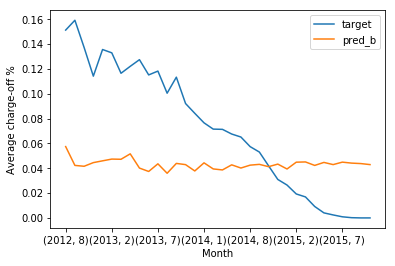

In [53]:
test1['month'] = pd.DatetimeIndex(test1['issue_d']).month
test1['year'] = pd.DatetimeIndex(test1['issue_d']).year
agg=pd.DataFrame(test1.groupby(['year','month'])['target'].mean())
test1['pred']=y_pred
test1['pred_b'] = np.where(test1['pred'] >= .5, 1, 0)
agg['pred_b']=test1.groupby(['year','month'])['pred_b'].mean()
# agg['yrmo']=np.concatenate(agg['year'])
agg.plot(xlabel="Month", ylabel="Average charge-off %")
# test1


In [15]:
# data prep for embedded

def df_to_dataset(dataframe, shuffle=True, batch_size=32):
    dataframe = dataframe.copy()
    labels = dataframe.pop('target')
    ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
    if shuffle:
        ds = ds.shuffle(buffer_size=len(dataframe))
    ds = ds.batch(batch_size)
    return ds

batch_size = 512
train_ds = df_to_dataset(train, batch_size=batch_size)
val_ds = df_to_dataset(val, shuffle=False, batch_size=batch_size)
test_ds = df_to_dataset(test, shuffle=False, batch_size=batch_size)

In [16]:
# convert categorical variables into categorical vocabulary columns
feature_columns = []

grade = feature_column.categorical_column_with_vocabulary_list('grade', dataframe.grade.unique())
grade_embedding = feature_column.embedding_column(grade, dimension=7)
feature_columns.append(grade_embedding)

sub_grade = feature_column.categorical_column_with_vocabulary_list('sub_grade', dataframe.sub_grade.unique())
sub_grade_embedding = feature_column.embedding_column(sub_grade, dimension=35)
feature_columns.append(sub_grade_embedding)

# emp_title = feature_column.categorical_column_with_vocabulary_list('emp_title', dataframe.emp_title.unique())
# emp_title_embedding = feature_column.embedding_column(emp_title, dimension=299272)
# feature_columns.append(emp_title_embedding)

home_ownership = feature_column.categorical_column_with_vocabulary_list('home_ownership', dataframe.home_ownership.unique())
home_ownership_embedding = feature_column.embedding_column(home_ownership, dimension=6)
feature_columns.append(home_ownership_embedding)

verification_status = feature_column.categorical_column_with_vocabulary_list('verification_status', dataframe.verification_status.unique())
verification_status_embedding = feature_column.embedding_column(verification_status, dimension=3)
feature_columns.append(verification_status_embedding)

purpose = feature_column.categorical_column_with_vocabulary_list('purpose', dataframe.purpose.unique())
purpose_embedding = feature_column.embedding_column(purpose, dimension=14)
feature_columns.append(purpose_embedding)

zip_code = feature_column.categorical_column_with_vocabulary_list('zip_code', dataframe.zip_code.unique())
zip_code_embedding = feature_column.embedding_column(zip_code, dimension=935)
feature_columns.append(zip_code_embedding)

initial_list_status = feature_column.categorical_column_with_vocabulary_list('initial_list_status', dataframe.zip_code.unique())
initial_list_status_embedding = feature_column.embedding_column(initial_list_status, dimension=2)
feature_columns.append(initial_list_status_embedding)

application_type = feature_column.categorical_column_with_vocabulary_list('application_type', dataframe.application_type.unique())
application_type_embedding = feature_column.embedding_column(application_type, dimension=2)
feature_columns.append(application_type_embedding)

addr_state = feature_column.categorical_column_with_vocabulary_list('addr_state', dataframe.addr_state.unique())
addr_state_embedding = feature_column.embedding_column(addr_state, dimension=2)
feature_columns.append(addr_state_embedding)

pymnt_plan = feature_column.categorical_column_with_vocabulary_list('pymnt_plan', dataframe.pymnt_plan.unique())
pymnt_plan_embedding = feature_column.embedding_column(pymnt_plan, dimension=2)
feature_columns.append(pymnt_plan_embedding)

# acc_now_delinq = feature_column.categorical_column_with_vocabulary_list('acc_now_delinq', dataframe.acc_now_delinq.unique())
# acc_now_delinq_embedding = feature_column.embedding_column(acc_now_delinq, dimension=2)
# feature_columns.append(acc_now_delinq_embedding)

# indicator variables 
# acc_now_delinq = feature_column.categorical_column_with_vocabulary_list(
#       'acc_now_delinq', ['0', '1','2','3','4','5','6','14'])
# acc_now_delinq_one_hot = feature_column.indicator_column(acc_now_delinq)
# feature_columns.append(acc_now_delinq_one_hot)

# pub_rec = feature_column.categorical_column_with_vocabulary_list(
#       'pub_rec', ['0', '1'])
# pub_rec_one_hot = feature_column.indicator_column(pub_rec)
# feature_columns.append(pub_rec_one_hot)

# term = feature_column.categorical_column_with_vocabulary_list(
#       'term', ['36', '60'])
# term_one_hot = feature_column.indicator_column(term)
# feature_columns.append(term_one_hot)



In [17]:

# convert numeric columns to features

        
for header in numeric_column_names: 
    feature_name = header
    feature_columns.append(feature_column.numeric_column(feature_name))




In [36]:
len(y_pred)

154794

In [18]:
# model with embedded categories

feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

model1 = tf.keras.Sequential([
  feature_layer,
  layers.Dense(128, activation='relu'),
  layers.Dense(128, activation='relu'),
  layers.Dropout(.1),
  layers.Dense(1, activation='sigmoid')
])

model1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model1.fit(train_ds,
          validation_data=val_ds,
          epochs=10)

Epoch 1/10
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.


268/968 [=======>......................] - ETA: 2:53:29 - loss: 0.7831 - accuracy: 0.121 - ETA: 7:38 - loss: 0.7595 - accuracy: 0.2207  - ETA: 5:44 - loss: 0.7375 - accuracy: 0.32 - ETA: 5:28 - loss: 0.7175 - accuracy: 0.39 - ETA: 4:36 - loss: 0.6989 - accuracy: 0.45 - ETA: 3:55 - loss: 0.6814 - accuracy: 0.50 - ETA: 3:26 - loss: 0.6649 - accuracy: 0.54 - ETA: 3:05 - loss: 0.6493 - accuracy: 0.57 - ETA: 2:50 - loss: 0.6345 - accuracy: 0.60 - ETA: 2:37 - loss: 0.6207 - accuracy: 0.62 - ETA: 2:27 - loss: 0.6075 - accuracy: 0.64 - ETA: 2:19 - loss: 0.5949 - accuracy: 0.65 - ETA: 2:13 - loss: 0.5830 - accuracy: 0.67 - ETA: 2:07 - loss: 0.5715 - accuracy: 0.68 - ETA: 2:02 - loss: 0.5605 - accuracy: 0.69 - ETA: 1:58 - loss: 0.5500 - accuracy: 0.71 - ETA: 1:54 - loss: 0.5397 - accuracy: 0.72 - ETA: 1:50 - loss: 0.5299 - accuracy: 0.72 - ETA: 1:47 - loss: 0.5206 - accuracy: 0.73 - ETA: 1:44 - loss: 0.5117 - accuracy: 0.74 - ETA: 1:42 - loss: 0.5032 - accuracy: 0.75 - ETA: 1:40 - loss: 0.4951 -

631/968 [==================>...........] - ETA: 40s - loss: 0.1526 - accuracy: 0.945 - ETA: 39s - loss: 0.1519 - accuracy: 0.946 - ETA: 39s - loss: 0.1515 - accuracy: 0.946 - ETA: 39s - loss: 0.1508 - accuracy: 0.946 - ETA: 39s - loss: 0.1502 - accuracy: 0.946 - ETA: 39s - loss: 0.1495 - accuracy: 0.947 - ETA: 39s - loss: 0.1489 - accuracy: 0.947 - ETA: 38s - loss: 0.1482 - accuracy: 0.947 - ETA: 38s - loss: 0.1476 - accuracy: 0.947 - ETA: 38s - loss: 0.1469 - accuracy: 0.948 - ETA: 38s - loss: 0.1463 - accuracy: 0.948 - ETA: 38s - loss: 0.1457 - accuracy: 0.948 - ETA: 37s - loss: 0.1454 - accuracy: 0.948 - ETA: 37s - loss: 0.1447 - accuracy: 0.948 - ETA: 37s - loss: 0.1441 - accuracy: 0.949 - ETA: 37s - loss: 0.1435 - accuracy: 0.949 - ETA: 37s - loss: 0.1432 - accuracy: 0.949 - ETA: 37s - loss: 0.1426 - accuracy: 0.949 - ETA: 36s - loss: 0.1420 - accuracy: 0.949 - ETA: 36s - loss: 0.1415 - accuracy: 0.950 - ETA: 36s - loss: 0.1409 - accuracy: 0.950 - ETA: 36s - loss: 0.1406 - accurac

964/968 [============================>.] - ETA: 15s - loss: 0.0877 - accuracy: 0.970 - ETA: 14s - loss: 0.0875 - accuracy: 0.970 - ETA: 14s - loss: 0.0873 - accuracy: 0.970 - ETA: 14s - loss: 0.0871 - accuracy: 0.970 - ETA: 14s - loss: 0.0869 - accuracy: 0.970 - ETA: 14s - loss: 0.0868 - accuracy: 0.970 - ETA: 14s - loss: 0.0866 - accuracy: 0.970 - ETA: 14s - loss: 0.0864 - accuracy: 0.970 - ETA: 14s - loss: 0.0862 - accuracy: 0.970 - ETA: 14s - loss: 0.0860 - accuracy: 0.970 - ETA: 14s - loss: 0.0860 - accuracy: 0.970 - ETA: 13s - loss: 0.0858 - accuracy: 0.970 - ETA: 13s - loss: 0.0856 - accuracy: 0.970 - ETA: 13s - loss: 0.0855 - accuracy: 0.970 - ETA: 13s - loss: 0.0853 - accuracy: 0.970 - ETA: 13s - loss: 0.0852 - accuracy: 0.970 - ETA: 13s - loss: 0.0850 - accuracy: 0.971 - ETA: 13s - loss: 0.0849 - accuracy: 0.971 - ETA: 13s - loss: 0.0847 - accuracy: 0.971 - ETA: 13s - loss: 0.0846 - accuracy: 0.971 - ETA: 13s - loss: 0.0845 - accuracy: 0.971 - ETA: 13s - loss: 0.0843 - accurac

968/968 [==============================] - ETA: 0s - loss: 0.0657 - accuracy: 0.97 - ETA: 0s - loss: 0.0657 - accuracy: 0.97 - ETA: 0s - loss: 0.0656 - accuracy: 0.97 - ETA: 0s - loss: 0.0656 - accuracy: 0.9779WARNING:tensorflow:Layers in a Sequential model should only have a single input tensor, but we receive a <class 'dict'> input: {'loan_amnt': <tf.Tensor 'ExpandDims_23:0' shape=(None, 1) dtype=float64>, 'funded_amnt': <tf.Tensor 'ExpandDims_11:0' shape=(None, 1) dtype=float64>, 'funded_amnt_inv': <tf.Tensor 'ExpandDims_12:0' shape=(None, 1) dtype=float64>, 'term': <tf.Tensor 'ExpandDims_36:0' shape=(None, 1) dtype=float64>, 'int_rate': <tf.Tensor 'ExpandDims_18:0' shape=(None, 1) dtype=float64>, 'installment': <tf.Tensor 'ExpandDims_17:0' shape=(None, 1) dtype=float64>, 'grade': <tf.Tensor 'ExpandDims_13:0' shape=(None, 1) dtype=string>, 'sub_grade': <tf.Tensor 'ExpandDims_35:0' shape=(None, 1) dtype=string>, 'emp_length': <tf.Tensor 'ExpandDims_10:0' shape=(None, 1) dtype=float64

316/968 [========>.....................] - ETA: 1:44:06 - loss: 0.0030 - accuracy: 1.000 - ETA: 39s - loss: 0.0034 - accuracy: 0.9995    - ETA: 36s - loss: 0.0036 - accuracy: 0.999 - ETA: 36s - loss: 0.0036 - accuracy: 0.999 - ETA: 36s - loss: 0.0037 - accuracy: 0.999 - ETA: 36s - loss: 0.0038 - accuracy: 0.999 - ETA: 37s - loss: 0.0038 - accuracy: 0.999 - ETA: 38s - loss: 0.0039 - accuracy: 0.999 - ETA: 39s - loss: 0.0039 - accuracy: 0.999 - ETA: 38s - loss: 0.0039 - accuracy: 0.999 - ETA: 39s - loss: 0.0039 - accuracy: 0.999 - ETA: 39s - loss: 0.0039 - accuracy: 0.999 - ETA: 39s - loss: 0.0038 - accuracy: 0.999 - ETA: 38s - loss: 0.0038 - accuracy: 0.999 - ETA: 38s - loss: 0.0038 - accuracy: 0.998 - ETA: 38s - loss: 0.0038 - accuracy: 0.998 - ETA: 38s - loss: 0.0038 - accuracy: 0.998 - ETA: 38s - loss: 0.0037 - accuracy: 0.998 - ETA: 37s - loss: 0.0037 - accuracy: 0.998 - ETA: 38s - loss: 0.0038 - accuracy: 0.998 - ETA: 38s - loss: 0.0038 - accuracy: 0.998 - ETA: 38s - loss: 0.0038 -

633/968 [==================>...........] - ETA: 28s - loss: 0.0033 - accuracy: 0.999 - ETA: 28s - loss: 0.0033 - accuracy: 0.999 - ETA: 27s - loss: 0.0033 - accuracy: 0.999 - ETA: 27s - loss: 0.0033 - accuracy: 0.999 - ETA: 27s - loss: 0.0033 - accuracy: 0.999 - ETA: 27s - loss: 0.0033 - accuracy: 0.999 - ETA: 27s - loss: 0.0033 - accuracy: 0.999 - ETA: 27s - loss: 0.0033 - accuracy: 0.999 - ETA: 27s - loss: 0.0033 - accuracy: 0.999 - ETA: 27s - loss: 0.0033 - accuracy: 0.999 - ETA: 27s - loss: 0.0033 - accuracy: 0.999 - ETA: 27s - loss: 0.0033 - accuracy: 0.999 - ETA: 27s - loss: 0.0033 - accuracy: 0.999 - ETA: 27s - loss: 0.0033 - accuracy: 0.999 - ETA: 27s - loss: 0.0033 - accuracy: 0.999 - ETA: 27s - loss: 0.0033 - accuracy: 0.999 - ETA: 26s - loss: 0.0033 - accuracy: 0.999 - ETA: 26s - loss: 0.0033 - accuracy: 0.999 - ETA: 26s - loss: 0.0033 - accuracy: 0.999 - ETA: 26s - loss: 0.0033 - accuracy: 0.999 - ETA: 26s - loss: 0.0033 - accuracy: 0.999 - ETA: 26s - loss: 0.0033 - accurac

922/968 [===========================>..] - ETA: 14s - loss: 0.0032 - accuracy: 0.999 - ETA: 14s - loss: 0.0032 - accuracy: 0.999 - ETA: 14s - loss: 0.0032 - accuracy: 0.999 - ETA: 14s - loss: 0.0032 - accuracy: 0.999 - ETA: 14s - loss: 0.0032 - accuracy: 0.999 - ETA: 14s - loss: 0.0032 - accuracy: 0.999 - ETA: 14s - loss: 0.0032 - accuracy: 0.999 - ETA: 13s - loss: 0.0032 - accuracy: 0.999 - ETA: 13s - loss: 0.0032 - accuracy: 0.999 - ETA: 13s - loss: 0.0032 - accuracy: 0.999 - ETA: 13s - loss: 0.0032 - accuracy: 0.999 - ETA: 13s - loss: 0.0032 - accuracy: 0.999 - ETA: 13s - loss: 0.0032 - accuracy: 0.999 - ETA: 13s - loss: 0.0032 - accuracy: 0.999 - ETA: 13s - loss: 0.0032 - accuracy: 0.999 - ETA: 13s - loss: 0.0032 - accuracy: 0.999 - ETA: 13s - loss: 0.0032 - accuracy: 0.999 - ETA: 13s - loss: 0.0032 - accuracy: 0.999 - ETA: 13s - loss: 0.0032 - accuracy: 0.999 - ETA: 13s - loss: 0.0032 - accuracy: 0.999 - ETA: 13s - loss: 0.0032 - accuracy: 0.999 - ETA: 13s - loss: 0.0032 - accurac

968/968 [==============================] - ETA: 2s - loss: 0.0032 - accuracy: 0.99 - ETA: 1s - loss: 0.0032 - accuracy: 0.99 - ETA: 1s - loss: 0.0032 - accuracy: 0.99 - ETA: 1s - loss: 0.0032 - accuracy: 0.99 - ETA: 1s - loss: 0.0032 - accuracy: 0.99 - ETA: 1s - loss: 0.0032 - accuracy: 0.99 - ETA: 1s - loss: 0.0032 - accuracy: 0.99 - ETA: 1s - loss: 0.0032 - accuracy: 0.99 - ETA: 1s - loss: 0.0032 - accuracy: 0.99 - ETA: 1s - loss: 0.0032 - accuracy: 0.99 - ETA: 1s - loss: 0.0032 - accuracy: 0.99 - ETA: 1s - loss: 0.0032 - accuracy: 0.99 - ETA: 1s - loss: 0.0032 - accuracy: 0.99 - ETA: 1s - loss: 0.0032 - accuracy: 0.99 - ETA: 1s - loss: 0.0032 - accuracy: 0.99 - ETA: 1s - loss: 0.0032 - accuracy: 0.99 - ETA: 1s - loss: 0.0032 - accuracy: 0.99 - ETA: 1s - loss: 0.0032 - accuracy: 0.99 - ETA: 1s - loss: 0.0032 - accuracy: 0.99 - ETA: 1s - loss: 0.0032 - accuracy: 0.99 - ETA: 1s - loss: 0.0032 - accuracy: 0.99 - ETA: 1s - loss: 0.0032 - accuracy: 0.99 - ETA: 1s - loss: 0.0032 - accuracy

276/968 [=======>......................] - ETA: 1:50:32 - loss: 0.0013 - accuracy: 1.000 - ETA: 46s - loss: 0.0011 - accuracy: 1.0000    - ETA: 47s - loss: 0.0011 - accuracy: 0.999 - ETA: 45s - loss: 0.0011 - accuracy: 0.999 - ETA: 44s - loss: 0.0011 - accuracy: 0.999 - ETA: 44s - loss: 0.0010 - accuracy: 0.999 - ETA: 44s - loss: 9.9157e-04 - accuracy: 0.999 - ETA: 45s - loss: 9.7508e-04 - accuracy: 0.999 - ETA: 47s - loss: 9.5937e-04 - accuracy: 0.999 - ETA: 46s - loss: 9.4193e-04 - accuracy: 0.999 - ETA: 46s - loss: 9.3146e-04 - accuracy: 0.999 - ETA: 47s - loss: 9.2019e-04 - accuracy: 0.999 - ETA: 45s - loss: 9.0203e-04 - accuracy: 0.999 - ETA: 45s - loss: 8.9549e-04 - accuracy: 0.999 - ETA: 45s - loss: 8.8710e-04 - accuracy: 0.999 - ETA: 45s - loss: 8.8536e-04 - accuracy: 0.999 - ETA: 45s - loss: 8.8969e-04 - accuracy: 0.999 - ETA: 45s - loss: 9.0677e-04 - accuracy: 0.999 - ETA: 45s - loss: 9.1930e-04 - accuracy: 0.999 - ETA: 45s - loss: 9.3181e-04 - accuracy: 0.999 - ETA: 45s - lo

551/968 [================>.............] - ETA: 33s - loss: 0.0020 - accuracy: 0.999 - ETA: 33s - loss: 0.0020 - accuracy: 0.999 - ETA: 33s - loss: 0.0020 - accuracy: 0.999 - ETA: 33s - loss: 0.0020 - accuracy: 0.999 - ETA: 33s - loss: 0.0020 - accuracy: 0.999 - ETA: 33s - loss: 0.0020 - accuracy: 0.999 - ETA: 33s - loss: 0.0020 - accuracy: 0.999 - ETA: 33s - loss: 0.0020 - accuracy: 0.999 - ETA: 33s - loss: 0.0020 - accuracy: 0.999 - ETA: 33s - loss: 0.0020 - accuracy: 0.999 - ETA: 33s - loss: 0.0020 - accuracy: 0.999 - ETA: 33s - loss: 0.0020 - accuracy: 0.999 - ETA: 32s - loss: 0.0020 - accuracy: 0.999 - ETA: 32s - loss: 0.0020 - accuracy: 0.999 - ETA: 32s - loss: 0.0020 - accuracy: 0.999 - ETA: 32s - loss: 0.0020 - accuracy: 0.999 - ETA: 32s - loss: 0.0020 - accuracy: 0.999 - ETA: 32s - loss: 0.0020 - accuracy: 0.999 - ETA: 32s - loss: 0.0020 - accuracy: 0.999 - ETA: 32s - loss: 0.0020 - accuracy: 0.999 - ETA: 32s - loss: 0.0020 - accuracy: 0.999 - ETA: 32s - loss: 0.0020 - accurac

806/968 [=======================>......] - ETA: 20s - loss: 0.0021 - accuracy: 0.999 - ETA: 20s - loss: 0.0021 - accuracy: 0.999 - ETA: 20s - loss: 0.0021 - accuracy: 0.999 - ETA: 20s - loss: 0.0021 - accuracy: 0.999 - ETA: 20s - loss: 0.0021 - accuracy: 0.999 - ETA: 20s - loss: 0.0021 - accuracy: 0.999 - ETA: 20s - loss: 0.0021 - accuracy: 0.999 - ETA: 20s - loss: 0.0021 - accuracy: 0.999 - ETA: 20s - loss: 0.0021 - accuracy: 0.999 - ETA: 20s - loss: 0.0021 - accuracy: 0.999 - ETA: 19s - loss: 0.0021 - accuracy: 0.999 - ETA: 19s - loss: 0.0021 - accuracy: 0.999 - ETA: 19s - loss: 0.0021 - accuracy: 0.999 - ETA: 19s - loss: 0.0021 - accuracy: 0.999 - ETA: 19s - loss: 0.0021 - accuracy: 0.999 - ETA: 19s - loss: 0.0021 - accuracy: 0.999 - ETA: 19s - loss: 0.0021 - accuracy: 0.999 - ETA: 19s - loss: 0.0021 - accuracy: 0.999 - ETA: 19s - loss: 0.0021 - accuracy: 0.999 - ETA: 19s - loss: 0.0021 - accuracy: 0.999 - ETA: 19s - loss: 0.0021 - accuracy: 0.999 - ETA: 19s - loss: 0.0021 - accurac

968/968 [==============================] - ETA: 8s - loss: 0.0021 - accuracy: 0.99 - ETA: 7s - loss: 0.0021 - accuracy: 0.99 - ETA: 7s - loss: 0.0021 - accuracy: 0.99 - ETA: 7s - loss: 0.0021 - accuracy: 0.99 - ETA: 7s - loss: 0.0021 - accuracy: 0.99 - ETA: 7s - loss: 0.0021 - accuracy: 0.99 - ETA: 7s - loss: 0.0021 - accuracy: 0.99 - ETA: 7s - loss: 0.0021 - accuracy: 0.99 - ETA: 7s - loss: 0.0021 - accuracy: 0.99 - ETA: 7s - loss: 0.0021 - accuracy: 0.99 - ETA: 7s - loss: 0.0021 - accuracy: 0.99 - ETA: 7s - loss: 0.0021 - accuracy: 0.99 - ETA: 7s - loss: 0.0021 - accuracy: 0.99 - ETA: 7s - loss: 0.0021 - accuracy: 0.99 - ETA: 7s - loss: 0.0021 - accuracy: 0.99 - ETA: 7s - loss: 0.0021 - accuracy: 0.99 - ETA: 6s - loss: 0.0021 - accuracy: 0.99 - ETA: 6s - loss: 0.0021 - accuracy: 0.99 - ETA: 6s - loss: 0.0021 - accuracy: 0.99 - ETA: 6s - loss: 0.0021 - accuracy: 0.99 - ETA: 6s - loss: 0.0021 - accuracy: 0.99 - ETA: 6s - loss: 0.0021 - accuracy: 0.99 - ETA: 6s - loss: 0.0021 - accuracy

170/968 [====>.........................] - ETA: 1:59:43 - loss: 9.9505e-04 - accuracy: 1.000 - ETA: 1:02 - loss: 7.9380e-04 - accuracy: 1.0000  - ETA: 58s - loss: 6.7847e-04 - accuracy: 1.0000 - ETA: 56s - loss: 6.3288e-04 - accuracy: 1.000 - ETA: 56s - loss: 5.9387e-04 - accuracy: 1.000 - ETA: 56s - loss: 5.6371e-04 - accuracy: 1.000 - ETA: 55s - loss: 5.3740e-04 - accuracy: 1.000 - ETA: 55s - loss: 5.2098e-04 - accuracy: 1.000 - ETA: 55s - loss: 5.0402e-04 - accuracy: 1.000 - ETA: 56s - loss: 4.9452e-04 - accuracy: 1.000 - ETA: 56s - loss: 4.8810e-04 - accuracy: 1.000 - ETA: 57s - loss: 4.8405e-04 - accuracy: 1.000 - ETA: 57s - loss: 4.7966e-04 - accuracy: 1.000 - ETA: 58s - loss: 4.7476e-04 - accuracy: 1.000 - ETA: 57s - loss: 4.6936e-04 - accuracy: 1.000 - ETA: 57s - loss: 4.6400e-04 - accuracy: 1.000 - ETA: 57s - loss: 4.6131e-04 - accuracy: 1.000 - ETA: 56s - loss: 4.5825e-04 - accuracy: 1.000 - ETA: 56s - loss: 4.5462e-04 - accuracy: 1.000 - ETA: 56s - loss: 4.5098e-04 - accurac

370/968 [==========>...................] - ETA: 51s - loss: 8.7393e-04 - accuracy: 0.999 - ETA: 51s - loss: 8.7588e-04 - accuracy: 0.999 - ETA: 51s - loss: 8.7778e-04 - accuracy: 0.999 - ETA: 51s - loss: 8.7963e-04 - accuracy: 0.999 - ETA: 51s - loss: 8.8186e-04 - accuracy: 0.999 - ETA: 51s - loss: 8.8411e-04 - accuracy: 0.999 - ETA: 51s - loss: 8.8633e-04 - accuracy: 0.999 - ETA: 51s - loss: 8.8855e-04 - accuracy: 0.999 - ETA: 51s - loss: 8.9074e-04 - accuracy: 0.999 - ETA: 50s - loss: 8.9288e-04 - accuracy: 0.999 - ETA: 50s - loss: 8.9496e-04 - accuracy: 0.999 - ETA: 50s - loss: 8.9698e-04 - accuracy: 0.999 - ETA: 50s - loss: 8.9894e-04 - accuracy: 0.999 - ETA: 50s - loss: 9.0108e-04 - accuracy: 0.999 - ETA: 50s - loss: 9.0315e-04 - accuracy: 0.999 - ETA: 50s - loss: 9.0541e-04 - accuracy: 0.999 - ETA: 50s - loss: 9.0762e-04 - accuracy: 0.999 - ETA: 50s - loss: 9.0977e-04 - accuracy: 0.999 - ETA: 50s - loss: 9.1187e-04 - accuracy: 0.999 - ETA: 50s - loss: 9.1391e-04 - accuracy: 0.999

584/968 [=================>............] - ETA: 37s - loss: 0.0012 - accuracy: 0.999 - ETA: 37s - loss: 0.0012 - accuracy: 0.999 - ETA: 37s - loss: 0.0012 - accuracy: 0.999 - ETA: 37s - loss: 0.0012 - accuracy: 0.999 - ETA: 37s - loss: 0.0012 - accuracy: 0.999 - ETA: 37s - loss: 0.0012 - accuracy: 0.999 - ETA: 37s - loss: 0.0012 - accuracy: 0.999 - ETA: 37s - loss: 0.0012 - accuracy: 0.999 - ETA: 37s - loss: 0.0012 - accuracy: 0.999 - ETA: 37s - loss: 0.0012 - accuracy: 0.999 - ETA: 36s - loss: 0.0012 - accuracy: 0.999 - ETA: 36s - loss: 0.0012 - accuracy: 0.999 - ETA: 36s - loss: 0.0012 - accuracy: 0.999 - ETA: 36s - loss: 0.0012 - accuracy: 0.999 - ETA: 36s - loss: 0.0012 - accuracy: 0.999 - ETA: 36s - loss: 0.0012 - accuracy: 0.999 - ETA: 36s - loss: 0.0012 - accuracy: 0.999 - ETA: 36s - loss: 0.0012 - accuracy: 0.999 - ETA: 36s - loss: 0.0012 - accuracy: 0.999 - ETA: 36s - loss: 0.0012 - accuracy: 0.999 - ETA: 35s - loss: 0.0012 - accuracy: 0.999 - ETA: 35s - loss: 0.0012 - accurac

783/968 [=======================>......] - ETA: 23s - loss: 0.0013 - accuracy: 0.999 - ETA: 23s - loss: 0.0013 - accuracy: 0.999 - ETA: 23s - loss: 0.0013 - accuracy: 0.999 - ETA: 23s - loss: 0.0013 - accuracy: 0.999 - ETA: 23s - loss: 0.0013 - accuracy: 0.999 - ETA: 23s - loss: 0.0013 - accuracy: 0.999 - ETA: 23s - loss: 0.0013 - accuracy: 0.999 - ETA: 23s - loss: 0.0013 - accuracy: 0.999 - ETA: 23s - loss: 0.0013 - accuracy: 0.999 - ETA: 23s - loss: 0.0013 - accuracy: 0.999 - ETA: 23s - loss: 0.0013 - accuracy: 0.999 - ETA: 22s - loss: 0.0013 - accuracy: 0.999 - ETA: 22s - loss: 0.0013 - accuracy: 0.999 - ETA: 22s - loss: 0.0013 - accuracy: 0.999 - ETA: 22s - loss: 0.0013 - accuracy: 0.999 - ETA: 22s - loss: 0.0013 - accuracy: 0.999 - ETA: 22s - loss: 0.0013 - accuracy: 0.999 - ETA: 22s - loss: 0.0013 - accuracy: 0.999 - ETA: 22s - loss: 0.0013 - accuracy: 0.999 - ETA: 22s - loss: 0.0013 - accuracy: 0.999 - ETA: 22s - loss: 0.0013 - accuracy: 0.999 - ETA: 22s - loss: 0.0013 - accurac

968/968 [==============================] - ETA: 11s - loss: 0.0014 - accuracy: 0.999 - ETA: 11s - loss: 0.0014 - accuracy: 0.999 - ETA: 11s - loss: 0.0014 - accuracy: 0.999 - ETA: 11s - loss: 0.0014 - accuracy: 0.999 - ETA: 10s - loss: 0.0014 - accuracy: 0.999 - ETA: 10s - loss: 0.0014 - accuracy: 0.999 - ETA: 10s - loss: 0.0014 - accuracy: 0.999 - ETA: 10s - loss: 0.0014 - accuracy: 0.999 - ETA: 10s - loss: 0.0014 - accuracy: 0.999 - ETA: 10s - loss: 0.0014 - accuracy: 0.999 - ETA: 10s - loss: 0.0014 - accuracy: 0.999 - ETA: 10s - loss: 0.0014 - accuracy: 0.999 - ETA: 10s - loss: 0.0014 - accuracy: 0.999 - ETA: 10s - loss: 0.0014 - accuracy: 0.999 - ETA: 10s - loss: 0.0014 - accuracy: 0.999 - ETA: 10s - loss: 0.0014 - accuracy: 0.999 - ETA: 10s - loss: 0.0014 - accuracy: 0.999 - ETA: 9s - loss: 0.0014 - accuracy: 0.999 - ETA: 9s - loss: 0.0014 - accuracy: 0.99 - ETA: 9s - loss: 0.0014 - accuracy: 0.99 - ETA: 9s - loss: 0.0014 - accuracy: 0.99 - ETA: 9s - loss: 0.0014 - accuracy: 0.99 

177/968 [====>.........................] - ETA: 2:13:10 - loss: 7.0918e-05 - accuracy: 1.000 - ETA: 1:23 - loss: 1.6910e-04 - accuracy: 1.0000  - ETA: 1:15 - loss: 2.8442e-04 - accuracy: 1.00 - ETA: 1:10 - loss: 3.1813e-04 - accuracy: 1.00 - ETA: 1:12 - loss: 4.6668e-04 - accuracy: 0.99 - ETA: 1:14 - loss: 5.4110e-04 - accuracy: 0.99 - ETA: 1:14 - loss: 5.7924e-04 - accuracy: 0.99 - ETA: 1:13 - loss: 6.0661e-04 - accuracy: 0.99 - ETA: 1:13 - loss: 6.2202e-04 - accuracy: 0.99 - ETA: 1:12 - loss: 6.2872e-04 - accuracy: 0.99 - ETA: 1:11 - loss: 6.3026e-04 - accuracy: 0.99 - ETA: 1:11 - loss: 6.2941e-04 - accuracy: 0.99 - ETA: 1:12 - loss: 6.2785e-04 - accuracy: 0.99 - ETA: 1:12 - loss: 6.2740e-04 - accuracy: 0.99 - ETA: 1:12 - loss: 6.2491e-04 - accuracy: 0.99 - ETA: 1:12 - loss: 6.2097e-04 - accuracy: 0.99 - ETA: 1:12 - loss: 6.2075e-04 - accuracy: 0.99 - ETA: 1:12 - loss: 6.2071e-04 - accuracy: 0.99 - ETA: 1:11 - loss: 6.3253e-04 - accuracy: 0.99 - ETA: 1:11 - loss: 6.4565e-04 - accurac

363/968 [==========>...................] - ETA: 1:03 - loss: 0.0017 - accuracy: 0.99 - ETA: 1:03 - loss: 0.0017 - accuracy: 0.99 - ETA: 1:03 - loss: 0.0017 - accuracy: 0.99 - ETA: 1:03 - loss: 0.0017 - accuracy: 0.99 - ETA: 1:02 - loss: 0.0017 - accuracy: 0.99 - ETA: 1:02 - loss: 0.0017 - accuracy: 0.99 - ETA: 1:02 - loss: 0.0017 - accuracy: 0.99 - ETA: 1:02 - loss: 0.0017 - accuracy: 0.99 - ETA: 1:02 - loss: 0.0017 - accuracy: 0.99 - ETA: 1:02 - loss: 0.0017 - accuracy: 0.99 - ETA: 1:02 - loss: 0.0017 - accuracy: 0.99 - ETA: 1:02 - loss: 0.0017 - accuracy: 0.99 - ETA: 1:02 - loss: 0.0017 - accuracy: 0.99 - ETA: 1:01 - loss: 0.0017 - accuracy: 0.99 - ETA: 1:01 - loss: 0.0017 - accuracy: 0.99 - ETA: 1:01 - loss: 0.0017 - accuracy: 0.99 - ETA: 1:01 - loss: 0.0017 - accuracy: 0.99 - ETA: 1:01 - loss: 0.0017 - accuracy: 0.99 - ETA: 1:01 - loss: 0.0017 - accuracy: 0.99 - ETA: 1:01 - loss: 0.0017 - accuracy: 0.99 - ETA: 1:01 - loss: 0.0017 - accuracy: 0.99 - ETA: 1:00 - loss: 0.0017 - accura

549/968 [================>.............] - ETA: 52s - loss: 0.0019 - accuracy: 0.999 - ETA: 52s - loss: 0.0019 - accuracy: 0.999 - ETA: 51s - loss: 0.0019 - accuracy: 0.999 - ETA: 51s - loss: 0.0019 - accuracy: 0.999 - ETA: 51s - loss: 0.0019 - accuracy: 0.999 - ETA: 51s - loss: 0.0019 - accuracy: 0.999 - ETA: 51s - loss: 0.0019 - accuracy: 0.999 - ETA: 51s - loss: 0.0019 - accuracy: 0.999 - ETA: 51s - loss: 0.0019 - accuracy: 0.999 - ETA: 51s - loss: 0.0019 - accuracy: 0.999 - ETA: 51s - loss: 0.0019 - accuracy: 0.999 - ETA: 51s - loss: 0.0019 - accuracy: 0.999 - ETA: 50s - loss: 0.0019 - accuracy: 0.999 - ETA: 50s - loss: 0.0019 - accuracy: 0.999 - ETA: 50s - loss: 0.0019 - accuracy: 0.999 - ETA: 50s - loss: 0.0019 - accuracy: 0.999 - ETA: 50s - loss: 0.0019 - accuracy: 0.999 - ETA: 50s - loss: 0.0019 - accuracy: 0.999 - ETA: 50s - loss: 0.0019 - accuracy: 0.999 - ETA: 50s - loss: 0.0019 - accuracy: 0.999 - ETA: 50s - loss: 0.0019 - accuracy: 0.999 - ETA: 49s - loss: 0.0019 - accurac

735/968 [=====================>........] - ETA: 34s - loss: 0.0019 - accuracy: 0.999 - ETA: 33s - loss: 0.0019 - accuracy: 0.999 - ETA: 33s - loss: 0.0019 - accuracy: 0.999 - ETA: 33s - loss: 0.0019 - accuracy: 0.999 - ETA: 33s - loss: 0.0019 - accuracy: 0.999 - ETA: 33s - loss: 0.0019 - accuracy: 0.999 - ETA: 33s - loss: 0.0019 - accuracy: 0.999 - ETA: 33s - loss: 0.0019 - accuracy: 0.999 - ETA: 33s - loss: 0.0019 - accuracy: 0.999 - ETA: 33s - loss: 0.0019 - accuracy: 0.999 - ETA: 33s - loss: 0.0019 - accuracy: 0.999 - ETA: 33s - loss: 0.0019 - accuracy: 0.999 - ETA: 32s - loss: 0.0019 - accuracy: 0.999 - ETA: 32s - loss: 0.0019 - accuracy: 0.999 - ETA: 32s - loss: 0.0019 - accuracy: 0.999 - ETA: 32s - loss: 0.0019 - accuracy: 0.999 - ETA: 32s - loss: 0.0019 - accuracy: 0.999 - ETA: 32s - loss: 0.0019 - accuracy: 0.999 - ETA: 32s - loss: 0.0019 - accuracy: 0.999 - ETA: 32s - loss: 0.0019 - accuracy: 0.999 - ETA: 32s - loss: 0.0019 - accuracy: 0.999 - ETA: 32s - loss: 0.0019 - accurac

924/968 [===========================>..] - ETA: 18s - loss: 0.0019 - accuracy: 0.999 - ETA: 18s - loss: 0.0019 - accuracy: 0.999 - ETA: 18s - loss: 0.0019 - accuracy: 0.999 - ETA: 18s - loss: 0.0019 - accuracy: 0.999 - ETA: 18s - loss: 0.0019 - accuracy: 0.999 - ETA: 18s - loss: 0.0019 - accuracy: 0.999 - ETA: 18s - loss: 0.0019 - accuracy: 0.999 - ETA: 18s - loss: 0.0019 - accuracy: 0.999 - ETA: 17s - loss: 0.0019 - accuracy: 0.999 - ETA: 17s - loss: 0.0019 - accuracy: 0.999 - ETA: 17s - loss: 0.0019 - accuracy: 0.999 - ETA: 17s - loss: 0.0019 - accuracy: 0.999 - ETA: 17s - loss: 0.0019 - accuracy: 0.999 - ETA: 17s - loss: 0.0019 - accuracy: 0.999 - ETA: 17s - loss: 0.0019 - accuracy: 0.999 - ETA: 17s - loss: 0.0019 - accuracy: 0.999 - ETA: 17s - loss: 0.0019 - accuracy: 0.999 - ETA: 17s - loss: 0.0019 - accuracy: 0.999 - ETA: 17s - loss: 0.0019 - accuracy: 0.999 - ETA: 17s - loss: 0.0019 - accuracy: 0.999 - ETA: 17s - loss: 0.0019 - accuracy: 0.999 - ETA: 16s - loss: 0.0019 - accurac

968/968 [==============================] - ETA: 3s - loss: 0.0019 - accuracy: 0.99 - ETA: 3s - loss: 0.0019 - accuracy: 0.99 - ETA: 3s - loss: 0.0019 - accuracy: 0.99 - ETA: 3s - loss: 0.0019 - accuracy: 0.99 - ETA: 3s - loss: 0.0019 - accuracy: 0.99 - ETA: 3s - loss: 0.0019 - accuracy: 0.99 - ETA: 3s - loss: 0.0019 - accuracy: 0.99 - ETA: 2s - loss: 0.0019 - accuracy: 0.99 - ETA: 2s - loss: 0.0019 - accuracy: 0.99 - ETA: 2s - loss: 0.0019 - accuracy: 0.99 - ETA: 2s - loss: 0.0019 - accuracy: 0.99 - ETA: 2s - loss: 0.0019 - accuracy: 0.99 - ETA: 2s - loss: 0.0019 - accuracy: 0.99 - ETA: 2s - loss: 0.0019 - accuracy: 0.99 - ETA: 2s - loss: 0.0019 - accuracy: 0.99 - ETA: 2s - loss: 0.0019 - accuracy: 0.99 - ETA: 2s - loss: 0.0019 - accuracy: 0.99 - ETA: 2s - loss: 0.0019 - accuracy: 0.99 - ETA: 2s - loss: 0.0019 - accuracy: 0.99 - ETA: 2s - loss: 0.0019 - accuracy: 0.99 - ETA: 1s - loss: 0.0019 - accuracy: 0.99 - ETA: 1s - loss: 0.0019 - accuracy: 0.99 - ETA: 1s - loss: 0.0019 - accuracy

183/968 [====>.........................] - ETA: 2:32:46 - loss: 1.3499e-04 - accuracy: 1.000 - ETA: 2:48 - loss: 3.1368e-04 - accuracy: 1.0000  - ETA: 2:29 - loss: 3.7712e-04 - accuracy: 1.00 - ETA: 2:13 - loss: 3.9536e-04 - accuracy: 1.00 - ETA: 2:04 - loss: 3.9795e-04 - accuracy: 1.00 - ETA: 1:56 - loss: 3.9968e-04 - accuracy: 1.00 - ETA: 1:51 - loss: 5.0085e-04 - accuracy: 0.99 - ETA: 1:47 - loss: 5.6241e-04 - accuracy: 0.99 - ETA: 1:43 - loss: 6.0545e-04 - accuracy: 0.99 - ETA: 1:41 - loss: 6.5084e-04 - accuracy: 0.99 - ETA: 1:40 - loss: 6.8002e-04 - accuracy: 0.99 - ETA: 1:38 - loss: 7.1314e-04 - accuracy: 0.99 - ETA: 1:40 - loss: 7.3883e-04 - accuracy: 0.99 - ETA: 1:40 - loss: 7.5971e-04 - accuracy: 0.99 - ETA: 1:41 - loss: 7.7522e-04 - accuracy: 0.99 - ETA: 1:40 - loss: 7.8592e-04 - accuracy: 0.99 - ETA: 1:39 - loss: 7.9564e-04 - accuracy: 0.99 - ETA: 1:39 - loss: 8.1761e-04 - accuracy: 0.99 - ETA: 1:38 - loss: 8.3738e-04 - accuracy: 0.99 - ETA: 1:37 - loss: 8.5517e-04 - accurac

369/968 [==========>...................] - ETA: 1:02 - loss: 0.0011 - accuracy: 0.99 - ETA: 1:02 - loss: 0.0011 - accuracy: 0.99 - ETA: 1:02 - loss: 0.0011 - accuracy: 0.99 - ETA: 1:02 - loss: 0.0011 - accuracy: 0.99 - ETA: 1:01 - loss: 0.0011 - accuracy: 0.99 - ETA: 1:01 - loss: 0.0011 - accuracy: 0.99 - ETA: 1:01 - loss: 0.0011 - accuracy: 0.99 - ETA: 1:01 - loss: 0.0011 - accuracy: 0.99 - ETA: 1:01 - loss: 0.0011 - accuracy: 0.99 - ETA: 1:01 - loss: 0.0011 - accuracy: 0.99 - ETA: 1:01 - loss: 0.0011 - accuracy: 0.99 - ETA: 1:01 - loss: 0.0011 - accuracy: 0.99 - ETA: 1:01 - loss: 0.0011 - accuracy: 0.99 - ETA: 1:01 - loss: 0.0011 - accuracy: 0.99 - ETA: 1:01 - loss: 0.0011 - accuracy: 0.99 - ETA: 1:00 - loss: 0.0011 - accuracy: 0.99 - ETA: 1:00 - loss: 0.0011 - accuracy: 0.99 - ETA: 1:00 - loss: 0.0011 - accuracy: 0.99 - ETA: 1:00 - loss: 0.0011 - accuracy: 0.99 - ETA: 1:00 - loss: 0.0011 - accuracy: 0.99 - ETA: 1:00 - loss: 0.0011 - accuracy: 0.99 - ETA: 1:00 - loss: 0.0011 - accura

555/968 [================>.............] - ETA: 46s - loss: 0.0012 - accuracy: 0.999 - ETA: 46s - loss: 0.0012 - accuracy: 0.999 - ETA: 46s - loss: 0.0012 - accuracy: 0.999 - ETA: 46s - loss: 0.0012 - accuracy: 0.999 - ETA: 46s - loss: 0.0012 - accuracy: 0.999 - ETA: 46s - loss: 0.0012 - accuracy: 0.999 - ETA: 46s - loss: 0.0012 - accuracy: 0.999 - ETA: 45s - loss: 0.0012 - accuracy: 0.999 - ETA: 45s - loss: 0.0012 - accuracy: 0.999 - ETA: 45s - loss: 0.0012 - accuracy: 0.999 - ETA: 45s - loss: 0.0012 - accuracy: 0.999 - ETA: 45s - loss: 0.0012 - accuracy: 0.999 - ETA: 45s - loss: 0.0012 - accuracy: 0.999 - ETA: 45s - loss: 0.0012 - accuracy: 0.999 - ETA: 45s - loss: 0.0012 - accuracy: 0.999 - ETA: 45s - loss: 0.0012 - accuracy: 0.999 - ETA: 45s - loss: 0.0012 - accuracy: 0.999 - ETA: 45s - loss: 0.0012 - accuracy: 0.999 - ETA: 45s - loss: 0.0012 - accuracy: 0.999 - ETA: 45s - loss: 0.0012 - accuracy: 0.999 - ETA: 44s - loss: 0.0012 - accuracy: 0.999 - ETA: 44s - loss: 0.0012 - accurac

741/968 [=====================>........] - ETA: 32s - loss: 0.0012 - accuracy: 0.999 - ETA: 32s - loss: 0.0012 - accuracy: 0.999 - ETA: 32s - loss: 0.0012 - accuracy: 0.999 - ETA: 32s - loss: 0.0012 - accuracy: 0.999 - ETA: 32s - loss: 0.0012 - accuracy: 0.999 - ETA: 32s - loss: 0.0012 - accuracy: 0.999 - ETA: 31s - loss: 0.0012 - accuracy: 0.999 - ETA: 31s - loss: 0.0012 - accuracy: 0.999 - ETA: 31s - loss: 0.0012 - accuracy: 0.999 - ETA: 31s - loss: 0.0012 - accuracy: 0.999 - ETA: 31s - loss: 0.0012 - accuracy: 0.999 - ETA: 31s - loss: 0.0012 - accuracy: 0.999 - ETA: 31s - loss: 0.0012 - accuracy: 0.999 - ETA: 31s - loss: 0.0012 - accuracy: 0.999 - ETA: 31s - loss: 0.0012 - accuracy: 0.999 - ETA: 31s - loss: 0.0012 - accuracy: 0.999 - ETA: 31s - loss: 0.0012 - accuracy: 0.999 - ETA: 31s - loss: 0.0012 - accuracy: 0.999 - ETA: 30s - loss: 0.0012 - accuracy: 0.999 - ETA: 30s - loss: 0.0012 - accuracy: 0.999 - ETA: 30s - loss: 0.0012 - accuracy: 0.999 - ETA: 30s - loss: 0.0012 - accurac

931/968 [===========================>..] - ETA: 17s - loss: 0.0012 - accuracy: 0.999 - ETA: 17s - loss: 0.0012 - accuracy: 0.999 - ETA: 17s - loss: 0.0012 - accuracy: 0.999 - ETA: 17s - loss: 0.0012 - accuracy: 0.999 - ETA: 17s - loss: 0.0012 - accuracy: 0.999 - ETA: 17s - loss: 0.0012 - accuracy: 0.999 - ETA: 17s - loss: 0.0012 - accuracy: 0.999 - ETA: 16s - loss: 0.0012 - accuracy: 0.999 - ETA: 16s - loss: 0.0012 - accuracy: 0.999 - ETA: 16s - loss: 0.0012 - accuracy: 0.999 - ETA: 16s - loss: 0.0012 - accuracy: 0.999 - ETA: 16s - loss: 0.0012 - accuracy: 0.999 - ETA: 16s - loss: 0.0012 - accuracy: 0.999 - ETA: 16s - loss: 0.0012 - accuracy: 0.999 - ETA: 16s - loss: 0.0012 - accuracy: 0.999 - ETA: 16s - loss: 0.0012 - accuracy: 0.999 - ETA: 16s - loss: 0.0012 - accuracy: 0.999 - ETA: 16s - loss: 0.0012 - accuracy: 0.999 - ETA: 16s - loss: 0.0012 - accuracy: 0.999 - ETA: 16s - loss: 0.0012 - accuracy: 0.999 - ETA: 15s - loss: 0.0012 - accuracy: 0.999 - ETA: 15s - loss: 0.0012 - accurac

968/968 [==============================] - ETA: 2s - loss: 0.0012 - accuracy: 0.99 - ETA: 2s - loss: 0.0012 - accuracy: 0.99 - ETA: 2s - loss: 0.0012 - accuracy: 0.99 - ETA: 2s - loss: 0.0012 - accuracy: 0.99 - ETA: 2s - loss: 0.0012 - accuracy: 0.99 - ETA: 2s - loss: 0.0012 - accuracy: 0.99 - ETA: 2s - loss: 0.0012 - accuracy: 0.99 - ETA: 2s - loss: 0.0012 - accuracy: 0.99 - ETA: 2s - loss: 0.0012 - accuracy: 0.99 - ETA: 2s - loss: 0.0012 - accuracy: 0.99 - ETA: 2s - loss: 0.0012 - accuracy: 0.99 - ETA: 2s - loss: 0.0012 - accuracy: 0.99 - ETA: 2s - loss: 0.0012 - accuracy: 0.99 - ETA: 1s - loss: 0.0012 - accuracy: 0.99 - ETA: 1s - loss: 0.0012 - accuracy: 0.99 - ETA: 1s - loss: 0.0012 - accuracy: 0.99 - ETA: 1s - loss: 0.0012 - accuracy: 0.99 - ETA: 1s - loss: 0.0012 - accuracy: 0.99 - ETA: 1s - loss: 0.0012 - accuracy: 0.99 - ETA: 1s - loss: 0.0012 - accuracy: 0.99 - ETA: 1s - loss: 0.0012 - accuracy: 0.99 - ETA: 1s - loss: 0.0012 - accuracy: 0.99 - ETA: 1s - loss: 0.0012 - accuracy

174/968 [====>.........................] - ETA: 2:39:37 - loss: 0.0052 - accuracy: 0.998 - ETA: 2:14 - loss: 0.0039 - accuracy: 0.9985  - ETA: 1:47 - loss: 0.0032 - accuracy: 0.99 - ETA: 1:36 - loss: 0.0028 - accuracy: 0.99 - ETA: 1:31 - loss: 0.0025 - accuracy: 0.99 - ETA: 1:25 - loss: 0.0023 - accuracy: 0.99 - ETA: 1:23 - loss: 0.0021 - accuracy: 0.99 - ETA: 1:22 - loss: 0.0019 - accuracy: 0.99 - ETA: 1:19 - loss: 0.0018 - accuracy: 0.99 - ETA: 1:20 - loss: 0.0017 - accuracy: 0.99 - ETA: 1:19 - loss: 0.0016 - accuracy: 0.99 - ETA: 1:17 - loss: 0.0016 - accuracy: 0.99 - ETA: 1:17 - loss: 0.0016 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0016 - accuracy: 0.99 - ETA: 1:18 - loss: 0.0015 - accuracy: 0.99 - ETA: 1:17 - loss: 0.0015 - accuracy: 0.99 - ETA: 1:16 - loss: 0.0015 - accuracy: 0.99 - ETA: 1:16 - loss: 0.0014 - accuracy: 0.99 - ETA: 1:15 - loss: 0.0014 - accuracy: 0.99 - ETA: 1:16 - loss: 0.0014 - accuracy: 0.99 - ETA: 1:14 - loss: 0.0014 - accuracy: 0.99 - ETA: 1:14 - loss: 0.0013 -

344/968 [=========>....................] - ETA: 1:01 - loss: 8.2618e-04 - accuracy: 0.99 - ETA: 1:01 - loss: 8.2586e-04 - accuracy: 0.99 - ETA: 1:01 - loss: 8.2553e-04 - accuracy: 0.99 - ETA: 1:01 - loss: 8.2519e-04 - accuracy: 0.99 - ETA: 1:01 - loss: 8.2485e-04 - accuracy: 0.99 - ETA: 1:01 - loss: 8.2449e-04 - accuracy: 0.99 - ETA: 1:01 - loss: 8.2415e-04 - accuracy: 0.99 - ETA: 1:01 - loss: 8.2379e-04 - accuracy: 0.99 - ETA: 1:01 - loss: 8.2343e-04 - accuracy: 0.99 - ETA: 1:01 - loss: 8.2305e-04 - accuracy: 0.99 - ETA: 1:01 - loss: 8.2271e-04 - accuracy: 0.99 - ETA: 1:01 - loss: 8.2235e-04 - accuracy: 0.99 - ETA: 1:01 - loss: 8.2199e-04 - accuracy: 0.99 - ETA: 1:01 - loss: 8.2161e-04 - accuracy: 0.99 - ETA: 1:01 - loss: 8.2122e-04 - accuracy: 0.99 - ETA: 1:01 - loss: 8.2082e-04 - accuracy: 0.99 - ETA: 1:01 - loss: 8.2041e-04 - accuracy: 0.99 - ETA: 1:01 - loss: 8.1998e-04 - accuracy: 0.99 - ETA: 1:01 - loss: 8.1955e-04 - accuracy: 0.99 - ETA: 1:01 - loss: 8.1911e-04 - accuracy: 0.99

514/968 [==============>...............] - ETA: 47s - loss: 8.2256e-04 - accuracy: 0.999 - ETA: 47s - loss: 8.2261e-04 - accuracy: 0.999 - ETA: 47s - loss: 8.2265e-04 - accuracy: 0.999 - ETA: 47s - loss: 8.2272e-04 - accuracy: 0.999 - ETA: 47s - loss: 8.2279e-04 - accuracy: 0.999 - ETA: 47s - loss: 8.2291e-04 - accuracy: 0.999 - ETA: 46s - loss: 8.2303e-04 - accuracy: 0.999 - ETA: 46s - loss: 8.2314e-04 - accuracy: 0.999 - ETA: 46s - loss: 8.2325e-04 - accuracy: 0.999 - ETA: 46s - loss: 8.2335e-04 - accuracy: 0.999 - ETA: 46s - loss: 8.2344e-04 - accuracy: 0.999 - ETA: 46s - loss: 8.2356e-04 - accuracy: 0.999 - ETA: 46s - loss: 8.2368e-04 - accuracy: 0.999 - ETA: 46s - loss: 8.2379e-04 - accuracy: 0.999 - ETA: 46s - loss: 8.2394e-04 - accuracy: 0.999 - ETA: 46s - loss: 8.2409e-04 - accuracy: 0.999 - ETA: 46s - loss: 8.2427e-04 - accuracy: 0.999 - ETA: 46s - loss: 8.2444e-04 - accuracy: 0.999 - ETA: 45s - loss: 8.2461e-04 - accuracy: 0.999 - ETA: 45s - loss: 8.2479e-04 - accuracy: 0.999

684/968 [====================>.........] - ETA: 34s - loss: 8.9709e-04 - accuracy: 0.999 - ETA: 33s - loss: 8.9755e-04 - accuracy: 0.999 - ETA: 33s - loss: 8.9800e-04 - accuracy: 0.999 - ETA: 33s - loss: 8.9845e-04 - accuracy: 0.999 - ETA: 33s - loss: 8.9889e-04 - accuracy: 0.999 - ETA: 33s - loss: 8.9933e-04 - accuracy: 0.999 - ETA: 33s - loss: 8.9977e-04 - accuracy: 0.999 - ETA: 33s - loss: 9.0021e-04 - accuracy: 0.999 - ETA: 33s - loss: 9.0065e-04 - accuracy: 0.999 - ETA: 33s - loss: 9.0108e-04 - accuracy: 0.999 - ETA: 33s - loss: 9.0151e-04 - accuracy: 0.999 - ETA: 33s - loss: 9.0194e-04 - accuracy: 0.999 - ETA: 33s - loss: 9.0236e-04 - accuracy: 0.999 - ETA: 33s - loss: 9.0277e-04 - accuracy: 0.999 - ETA: 32s - loss: 9.0319e-04 - accuracy: 0.999 - ETA: 32s - loss: 9.0359e-04 - accuracy: 0.999 - ETA: 32s - loss: 9.0400e-04 - accuracy: 0.999 - ETA: 32s - loss: 9.0440e-04 - accuracy: 0.999 - ETA: 32s - loss: 9.0480e-04 - accuracy: 0.999 - ETA: 32s - loss: 9.0520e-04 - accuracy: 0.999

855/968 [=========================>....] - ETA: 21s - loss: 9.4351e-04 - accuracy: 0.999 - ETA: 20s - loss: 9.4378e-04 - accuracy: 0.999 - ETA: 20s - loss: 9.4406e-04 - accuracy: 0.999 - ETA: 20s - loss: 9.4434e-04 - accuracy: 0.999 - ETA: 20s - loss: 9.4463e-04 - accuracy: 0.999 - ETA: 20s - loss: 9.4493e-04 - accuracy: 0.999 - ETA: 20s - loss: 9.4522e-04 - accuracy: 0.999 - ETA: 20s - loss: 9.4551e-04 - accuracy: 0.999 - ETA: 20s - loss: 9.4580e-04 - accuracy: 0.999 - ETA: 20s - loss: 9.4610e-04 - accuracy: 0.999 - ETA: 20s - loss: 9.4641e-04 - accuracy: 0.999 - ETA: 20s - loss: 9.4671e-04 - accuracy: 0.999 - ETA: 20s - loss: 9.4702e-04 - accuracy: 0.999 - ETA: 20s - loss: 9.4733e-04 - accuracy: 0.999 - ETA: 20s - loss: 9.4770e-04 - accuracy: 0.999 - ETA: 19s - loss: 9.4806e-04 - accuracy: 0.999 - ETA: 19s - loss: 9.4842e-04 - accuracy: 0.999 - ETA: 19s - loss: 9.4878e-04 - accuracy: 0.999 - ETA: 19s - loss: 9.4914e-04 - accuracy: 0.999 - ETA: 19s - loss: 9.4950e-04 - accuracy: 0.999

968/968 [==============================] - ETA: 8s - loss: 9.9488e-04 - accuracy: 0.99 - ETA: 8s - loss: 9.9515e-04 - accuracy: 0.99 - ETA: 8s - loss: 9.9541e-04 - accuracy: 0.99 - ETA: 8s - loss: 9.9568e-04 - accuracy: 0.99 - ETA: 8s - loss: 9.9594e-04 - accuracy: 0.99 - ETA: 8s - loss: 9.9619e-04 - accuracy: 0.99 - ETA: 7s - loss: 9.9645e-04 - accuracy: 0.99 - ETA: 7s - loss: 9.9671e-04 - accuracy: 0.99 - ETA: 7s - loss: 9.9697e-04 - accuracy: 0.99 - ETA: 7s - loss: 9.9724e-04 - accuracy: 0.99 - ETA: 7s - loss: 9.9751e-04 - accuracy: 0.99 - ETA: 7s - loss: 9.9778e-04 - accuracy: 0.99 - ETA: 7s - loss: 9.9805e-04 - accuracy: 0.99 - ETA: 7s - loss: 9.9832e-04 - accuracy: 0.99 - ETA: 7s - loss: 9.9858e-04 - accuracy: 0.99 - ETA: 7s - loss: 9.9884e-04 - accuracy: 0.99 - ETA: 7s - loss: 9.9911e-04 - accuracy: 0.99 - ETA: 7s - loss: 9.9936e-04 - accuracy: 0.99 - ETA: 7s - loss: 9.9962e-04 - accuracy: 0.99 - ETA: 7s - loss: 9.9988e-04 - accuracy: 0.99 - ETA: 6s - loss: 0.0010 - accuracy: 0.

181/968 [====>.........................] - ETA: 2:23:24 - loss: 0.0046 - accuracy: 0.998 - ETA: 58s - loss: 0.0035 - accuracy: 0.9985    - ETA: 58s - loss: 0.0030 - accuracy: 0.998 - ETA: 59s - loss: 0.0026 - accuracy: 0.999 - ETA: 58s - loss: 0.0023 - accuracy: 0.999 - ETA: 1:00 - loss: 0.0021 - accuracy: 0.99 - ETA: 1:00 - loss: 0.0020 - accuracy: 0.99 - ETA: 1:01 - loss: 0.0018 - accuracy: 0.99 - ETA: 1:02 - loss: 0.0017 - accuracy: 0.99 - ETA: 1:02 - loss: 0.0016 - accuracy: 0.99 - ETA: 1:01 - loss: 0.0016 - accuracy: 0.99 - ETA: 1:01 - loss: 0.0015 - accuracy: 0.99 - ETA: 1:01 - loss: 0.0014 - accuracy: 0.99 - ETA: 1:00 - loss: 0.0014 - accuracy: 0.99 - ETA: 1:00 - loss: 0.0013 - accuracy: 0.99 - ETA: 1:01 - loss: 0.0013 - accuracy: 0.99 - ETA: 1:01 - loss: 0.0012 - accuracy: 0.99 - ETA: 1:01 - loss: 0.0012 - accuracy: 0.99 - ETA: 1:01 - loss: 0.0012 - accuracy: 0.99 - ETA: 1:01 - loss: 0.0011 - accuracy: 0.99 - ETA: 1:02 - loss: 0.0011 - accuracy: 0.99 - ETA: 1:02 - loss: 0.0011 

367/968 [==========>...................] - ETA: 55s - loss: 0.0010 - accuracy: 0.999 - ETA: 55s - loss: 0.0010 - accuracy: 0.999 - ETA: 55s - loss: 0.0010 - accuracy: 0.999 - ETA: 55s - loss: 0.0010 - accuracy: 0.999 - ETA: 55s - loss: 0.0010 - accuracy: 0.999 - ETA: 55s - loss: 0.0010 - accuracy: 0.999 - ETA: 55s - loss: 0.0010 - accuracy: 0.999 - ETA: 55s - loss: 0.0010 - accuracy: 0.999 - ETA: 55s - loss: 0.0010 - accuracy: 0.999 - ETA: 55s - loss: 0.0010 - accuracy: 0.999 - ETA: 54s - loss: 0.0010 - accuracy: 0.999 - ETA: 54s - loss: 0.0010 - accuracy: 0.999 - ETA: 54s - loss: 0.0010 - accuracy: 0.999 - ETA: 54s - loss: 0.0010 - accuracy: 0.999 - ETA: 54s - loss: 0.0010 - accuracy: 0.999 - ETA: 54s - loss: 0.0010 - accuracy: 0.999 - ETA: 54s - loss: 0.0010 - accuracy: 0.999 - ETA: 54s - loss: 0.0010 - accuracy: 0.999 - ETA: 54s - loss: 0.0010 - accuracy: 0.999 - ETA: 54s - loss: 0.0010 - accuracy: 0.999 - ETA: 54s - loss: 0.0010 - accuracy: 0.999 - ETA: 54s - loss: 0.0010 - accurac

553/968 [================>.............] - ETA: 42s - loss: 0.0010 - accuracy: 0.999 - ETA: 42s - loss: 0.0010 - accuracy: 0.999 - ETA: 42s - loss: 0.0010 - accuracy: 0.999 - ETA: 42s - loss: 0.0010 - accuracy: 0.999 - ETA: 42s - loss: 0.0011 - accuracy: 0.999 - ETA: 42s - loss: 0.0011 - accuracy: 0.999 - ETA: 42s - loss: 0.0011 - accuracy: 0.999 - ETA: 41s - loss: 0.0011 - accuracy: 0.999 - ETA: 41s - loss: 0.0011 - accuracy: 0.999 - ETA: 41s - loss: 0.0011 - accuracy: 0.999 - ETA: 41s - loss: 0.0011 - accuracy: 0.999 - ETA: 41s - loss: 0.0011 - accuracy: 0.999 - ETA: 41s - loss: 0.0011 - accuracy: 0.999 - ETA: 41s - loss: 0.0011 - accuracy: 0.999 - ETA: 41s - loss: 0.0011 - accuracy: 0.999 - ETA: 41s - loss: 0.0011 - accuracy: 0.999 - ETA: 41s - loss: 0.0011 - accuracy: 0.999 - ETA: 41s - loss: 0.0011 - accuracy: 0.999 - ETA: 41s - loss: 0.0011 - accuracy: 0.999 - ETA: 41s - loss: 0.0011 - accuracy: 0.999 - ETA: 41s - loss: 0.0011 - accuracy: 0.999 - ETA: 40s - loss: 0.0011 - accurac

739/968 [=====================>........] - ETA: 29s - loss: 0.0011 - accuracy: 0.999 - ETA: 29s - loss: 0.0011 - accuracy: 0.999 - ETA: 29s - loss: 0.0011 - accuracy: 0.999 - ETA: 29s - loss: 0.0011 - accuracy: 0.999 - ETA: 29s - loss: 0.0011 - accuracy: 0.999 - ETA: 29s - loss: 0.0011 - accuracy: 0.999 - ETA: 28s - loss: 0.0011 - accuracy: 0.999 - ETA: 28s - loss: 0.0011 - accuracy: 0.999 - ETA: 28s - loss: 0.0011 - accuracy: 0.999 - ETA: 28s - loss: 0.0011 - accuracy: 0.999 - ETA: 28s - loss: 0.0011 - accuracy: 0.999 - ETA: 28s - loss: 0.0011 - accuracy: 0.999 - ETA: 28s - loss: 0.0011 - accuracy: 0.999 - ETA: 28s - loss: 0.0011 - accuracy: 0.999 - ETA: 28s - loss: 0.0011 - accuracy: 0.999 - ETA: 28s - loss: 0.0011 - accuracy: 0.999 - ETA: 28s - loss: 0.0011 - accuracy: 0.999 - ETA: 28s - loss: 0.0011 - accuracy: 0.999 - ETA: 28s - loss: 0.0011 - accuracy: 0.999 - ETA: 28s - loss: 0.0011 - accuracy: 0.999 - ETA: 27s - loss: 0.0011 - accuracy: 0.999 - ETA: 27s - loss: 0.0011 - accurac

929/968 [===========================>..] - ETA: 16s - loss: 0.0011 - accuracy: 0.999 - ETA: 16s - loss: 0.0011 - accuracy: 0.999 - ETA: 16s - loss: 0.0011 - accuracy: 0.999 - ETA: 16s - loss: 0.0011 - accuracy: 0.999 - ETA: 15s - loss: 0.0011 - accuracy: 0.999 - ETA: 15s - loss: 0.0011 - accuracy: 0.999 - ETA: 15s - loss: 0.0011 - accuracy: 0.999 - ETA: 15s - loss: 0.0011 - accuracy: 0.999 - ETA: 15s - loss: 0.0011 - accuracy: 0.999 - ETA: 15s - loss: 0.0011 - accuracy: 0.999 - ETA: 15s - loss: 0.0011 - accuracy: 0.999 - ETA: 15s - loss: 0.0011 - accuracy: 0.999 - ETA: 15s - loss: 0.0011 - accuracy: 0.999 - ETA: 15s - loss: 0.0011 - accuracy: 0.999 - ETA: 15s - loss: 0.0011 - accuracy: 0.999 - ETA: 15s - loss: 0.0011 - accuracy: 0.999 - ETA: 15s - loss: 0.0011 - accuracy: 0.999 - ETA: 15s - loss: 0.0011 - accuracy: 0.999 - ETA: 14s - loss: 0.0011 - accuracy: 0.999 - ETA: 14s - loss: 0.0011 - accuracy: 0.999 - ETA: 14s - loss: 0.0011 - accuracy: 0.999 - ETA: 14s - loss: 0.0011 - accurac

968/968 [==============================] - ETA: 2s - loss: 0.0011 - accuracy: 0.99 - ETA: 2s - loss: 0.0011 - accuracy: 0.99 - ETA: 2s - loss: 0.0011 - accuracy: 0.99 - ETA: 2s - loss: 0.0011 - accuracy: 0.99 - ETA: 2s - loss: 0.0011 - accuracy: 0.99 - ETA: 2s - loss: 0.0011 - accuracy: 0.99 - ETA: 2s - loss: 0.0011 - accuracy: 0.99 - ETA: 2s - loss: 0.0011 - accuracy: 0.99 - ETA: 2s - loss: 0.0011 - accuracy: 0.99 - ETA: 2s - loss: 0.0011 - accuracy: 0.99 - ETA: 2s - loss: 0.0011 - accuracy: 0.99 - ETA: 2s - loss: 0.0011 - accuracy: 0.99 - ETA: 2s - loss: 0.0011 - accuracy: 0.99 - ETA: 1s - loss: 0.0011 - accuracy: 0.99 - ETA: 1s - loss: 0.0011 - accuracy: 0.99 - ETA: 1s - loss: 0.0011 - accuracy: 0.99 - ETA: 1s - loss: 0.0011 - accuracy: 0.99 - ETA: 1s - loss: 0.0011 - accuracy: 0.99 - ETA: 1s - loss: 0.0011 - accuracy: 0.99 - ETA: 1s - loss: 0.0011 - accuracy: 0.99 - ETA: 1s - loss: 0.0011 - accuracy: 0.99 - ETA: 1s - loss: 0.0011 - accuracy: 0.99 - ETA: 1s - loss: 0.0011 - accuracy

172/968 [====>.........................] - ETA: 2:55:11 - loss: 0.0034 - accuracy: 0.998 - ETA: 3:59 - loss: 0.0027 - accuracy: 0.9985  - ETA: 2:46 - loss: 0.0022 - accuracy: 0.99 - ETA: 2:14 - loss: 0.0019 - accuracy: 0.99 - ETA: 2:02 - loss: 0.0017 - accuracy: 0.99 - ETA: 1:52 - loss: 0.0016 - accuracy: 0.99 - ETA: 1:44 - loss: 0.0015 - accuracy: 0.99 - ETA: 1:42 - loss: 0.0014 - accuracy: 0.99 - ETA: 1:39 - loss: 0.0013 - accuracy: 0.99 - ETA: 1:36 - loss: 0.0012 - accuracy: 0.99 - ETA: 1:34 - loss: 0.0012 - accuracy: 0.99 - ETA: 1:32 - loss: 0.0012 - accuracy: 0.99 - ETA: 1:32 - loss: 0.0011 - accuracy: 0.99 - ETA: 1:30 - loss: 0.0011 - accuracy: 0.99 - ETA: 1:30 - loss: 0.0011 - accuracy: 0.99 - ETA: 1:29 - loss: 0.0011 - accuracy: 0.99 - ETA: 1:28 - loss: 0.0010 - accuracy: 0.99 - ETA: 1:27 - loss: 0.0010 - accuracy: 0.99 - ETA: 1:27 - loss: 9.9576e-04 - accuracy: 0.99 - ETA: 1:26 - loss: 9.7659e-04 - accuracy: 0.99 - ETA: 1:26 - loss: 9.5789e-04 - accuracy: 0.99 - ETA: 1:26 - lo

342/968 [=========>....................] - ETA: 1:04 - loss: 7.5665e-04 - accuracy: 0.99 - ETA: 1:04 - loss: 7.5600e-04 - accuracy: 0.99 - ETA: 1:04 - loss: 7.5533e-04 - accuracy: 0.99 - ETA: 1:04 - loss: 7.5466e-04 - accuracy: 0.99 - ETA: 1:04 - loss: 7.5403e-04 - accuracy: 0.99 - ETA: 1:04 - loss: 7.5339e-04 - accuracy: 0.99 - ETA: 1:04 - loss: 7.5274e-04 - accuracy: 0.99 - ETA: 1:04 - loss: 7.5207e-04 - accuracy: 0.99 - ETA: 1:04 - loss: 7.5141e-04 - accuracy: 0.99 - ETA: 1:04 - loss: 7.5073e-04 - accuracy: 0.99 - ETA: 1:04 - loss: 7.5004e-04 - accuracy: 0.99 - ETA: 1:04 - loss: 7.4936e-04 - accuracy: 0.99 - ETA: 1:03 - loss: 7.4866e-04 - accuracy: 0.99 - ETA: 1:03 - loss: 7.4795e-04 - accuracy: 0.99 - ETA: 1:03 - loss: 7.4725e-04 - accuracy: 0.99 - ETA: 1:03 - loss: 7.4655e-04 - accuracy: 0.99 - ETA: 1:03 - loss: 7.4583e-04 - accuracy: 0.99 - ETA: 1:03 - loss: 7.4512e-04 - accuracy: 0.99 - ETA: 1:03 - loss: 7.4440e-04 - accuracy: 0.99 - ETA: 1:03 - loss: 7.4369e-04 - accuracy: 0.99

512/968 [==============>...............] - ETA: 50s - loss: 6.5063e-04 - accuracy: 0.999 - ETA: 50s - loss: 6.5033e-04 - accuracy: 0.999 - ETA: 50s - loss: 6.5004e-04 - accuracy: 0.999 - ETA: 50s - loss: 6.4976e-04 - accuracy: 0.999 - ETA: 50s - loss: 6.4949e-04 - accuracy: 0.999 - ETA: 50s - loss: 6.4921e-04 - accuracy: 0.999 - ETA: 49s - loss: 6.4893e-04 - accuracy: 0.999 - ETA: 49s - loss: 6.4865e-04 - accuracy: 0.999 - ETA: 49s - loss: 6.4836e-04 - accuracy: 0.999 - ETA: 49s - loss: 6.4808e-04 - accuracy: 0.999 - ETA: 49s - loss: 6.4784e-04 - accuracy: 0.999 - ETA: 49s - loss: 6.4760e-04 - accuracy: 0.999 - ETA: 49s - loss: 6.4737e-04 - accuracy: 0.999 - ETA: 49s - loss: 6.4714e-04 - accuracy: 0.999 - ETA: 49s - loss: 6.4695e-04 - accuracy: 0.999 - ETA: 49s - loss: 6.4675e-04 - accuracy: 0.999 - ETA: 49s - loss: 6.4658e-04 - accuracy: 0.999 - ETA: 48s - loss: 6.4640e-04 - accuracy: 0.999 - ETA: 48s - loss: 6.4622e-04 - accuracy: 0.999 - ETA: 48s - loss: 6.4604e-04 - accuracy: 0.999

682/968 [====================>.........] - ETA: 36s - loss: 6.3421e-04 - accuracy: 0.999 - ETA: 36s - loss: 6.3415e-04 - accuracy: 0.999 - ETA: 36s - loss: 6.3409e-04 - accuracy: 0.999 - ETA: 36s - loss: 6.3403e-04 - accuracy: 0.999 - ETA: 35s - loss: 6.3397e-04 - accuracy: 0.999 - ETA: 35s - loss: 6.3390e-04 - accuracy: 0.999 - ETA: 35s - loss: 6.3384e-04 - accuracy: 0.999 - ETA: 35s - loss: 6.3378e-04 - accuracy: 0.999 - ETA: 35s - loss: 6.3372e-04 - accuracy: 0.999 - ETA: 35s - loss: 6.3365e-04 - accuracy: 0.999 - ETA: 35s - loss: 6.3359e-04 - accuracy: 0.999 - ETA: 35s - loss: 6.3352e-04 - accuracy: 0.999 - ETA: 35s - loss: 6.3346e-04 - accuracy: 0.999 - ETA: 35s - loss: 6.3339e-04 - accuracy: 0.999 - ETA: 35s - loss: 6.3332e-04 - accuracy: 0.999 - ETA: 35s - loss: 6.3325e-04 - accuracy: 0.999 - ETA: 35s - loss: 6.3318e-04 - accuracy: 0.999 - ETA: 34s - loss: 6.3311e-04 - accuracy: 0.999 - ETA: 34s - loss: 6.3303e-04 - accuracy: 0.999 - ETA: 34s - loss: 6.3296e-04 - accuracy: 0.999

853/968 [=========================>....] - ETA: 22s - loss: 6.3302e-04 - accuracy: 0.999 - ETA: 22s - loss: 6.3315e-04 - accuracy: 0.999 - ETA: 22s - loss: 6.3328e-04 - accuracy: 0.999 - ETA: 22s - loss: 6.3341e-04 - accuracy: 0.999 - ETA: 22s - loss: 6.3354e-04 - accuracy: 0.999 - ETA: 22s - loss: 6.3366e-04 - accuracy: 0.999 - ETA: 22s - loss: 6.3379e-04 - accuracy: 0.999 - ETA: 22s - loss: 6.3392e-04 - accuracy: 0.999 - ETA: 22s - loss: 6.3404e-04 - accuracy: 0.999 - ETA: 22s - loss: 6.3417e-04 - accuracy: 0.999 - ETA: 21s - loss: 6.3432e-04 - accuracy: 0.999 - ETA: 21s - loss: 6.3447e-04 - accuracy: 0.999 - ETA: 21s - loss: 6.3462e-04 - accuracy: 0.999 - ETA: 21s - loss: 6.3477e-04 - accuracy: 0.999 - ETA: 21s - loss: 6.3491e-04 - accuracy: 0.999 - ETA: 21s - loss: 6.3506e-04 - accuracy: 0.999 - ETA: 21s - loss: 6.3522e-04 - accuracy: 0.999 - ETA: 21s - loss: 6.3537e-04 - accuracy: 0.999 - ETA: 21s - loss: 6.3553e-04 - accuracy: 0.999 - ETA: 21s - loss: 6.3568e-04 - accuracy: 0.999

968/968 [==============================] - ETA: 9s - loss: 6.6380e-04 - accuracy: 0.99 - ETA: 9s - loss: 6.6395e-04 - accuracy: 0.99 - ETA: 8s - loss: 6.6410e-04 - accuracy: 0.99 - ETA: 8s - loss: 6.6425e-04 - accuracy: 0.99 - ETA: 8s - loss: 6.6440e-04 - accuracy: 0.99 - ETA: 8s - loss: 6.6455e-04 - accuracy: 0.99 - ETA: 8s - loss: 6.6469e-04 - accuracy: 0.99 - ETA: 8s - loss: 6.6483e-04 - accuracy: 0.99 - ETA: 8s - loss: 6.6498e-04 - accuracy: 0.99 - ETA: 8s - loss: 6.6512e-04 - accuracy: 0.99 - ETA: 8s - loss: 6.6526e-04 - accuracy: 0.99 - ETA: 8s - loss: 6.6540e-04 - accuracy: 0.99 - ETA: 8s - loss: 6.6553e-04 - accuracy: 0.99 - ETA: 8s - loss: 6.6567e-04 - accuracy: 0.99 - ETA: 7s - loss: 6.6581e-04 - accuracy: 0.99 - ETA: 7s - loss: 6.6594e-04 - accuracy: 0.99 - ETA: 7s - loss: 6.6608e-04 - accuracy: 0.99 - ETA: 7s - loss: 6.6621e-04 - accuracy: 0.99 - ETA: 7s - loss: 6.6634e-04 - accuracy: 0.99 - ETA: 7s - loss: 6.6647e-04 - accuracy: 0.99 - ETA: 7s - loss: 6.6660e-04 - accuracy

183/968 [====>.........................] - ETA: 3:18:50 - loss: 2.0581e-06 - accuracy: 1.000 - ETA: 2:13 - loss: 7.4150e-05 - accuracy: 1.0000  - ETA: 1:50 - loss: 1.0274e-04 - accuracy: 1.00 - ETA: 1:44 - loss: 5.2098e-04 - accuracy: 0.99 - ETA: 1:39 - loss: 7.0268e-04 - accuracy: 0.99 - ETA: 1:37 - loss: 7.8896e-04 - accuracy: 0.99 - ETA: 1:32 - loss: 8.3279e-04 - accuracy: 0.99 - ETA: 1:32 - loss: 8.6138e-04 - accuracy: 0.99 - ETA: 1:29 - loss: 8.7274e-04 - accuracy: 0.99 - ETA: 1:28 - loss: 8.7686e-04 - accuracy: 0.99 - ETA: 1:27 - loss: 8.7736e-04 - accuracy: 0.99 - ETA: 1:27 - loss: 8.7330e-04 - accuracy: 0.99 - ETA: 1:26 - loss: 8.9299e-04 - accuracy: 0.99 - ETA: 1:26 - loss: 9.2176e-04 - accuracy: 0.99 - ETA: 1:25 - loss: 9.4869e-04 - accuracy: 0.99 - ETA: 1:25 - loss: 9.6725e-04 - accuracy: 0.99 - ETA: 1:25 - loss: 9.7933e-04 - accuracy: 0.99 - ETA: 1:24 - loss: 9.8761e-04 - accuracy: 0.99 - ETA: 1:24 - loss: 9.9192e-04 - accuracy: 0.99 - ETA: 1:24 - loss: 9.9513e-04 - accurac

369/968 [==========>...................] - ETA: 1:06 - loss: 0.0010 - accuracy: 0.99 - ETA: 1:06 - loss: 0.0010 - accuracy: 0.99 - ETA: 1:06 - loss: 0.0010 - accuracy: 0.99 - ETA: 1:06 - loss: 0.0010 - accuracy: 0.99 - ETA: 1:06 - loss: 0.0010 - accuracy: 0.99 - ETA: 1:06 - loss: 0.0010 - accuracy: 0.99 - ETA: 1:06 - loss: 0.0010 - accuracy: 0.99 - ETA: 1:05 - loss: 0.0010 - accuracy: 0.99 - ETA: 1:05 - loss: 0.0010 - accuracy: 0.99 - ETA: 1:05 - loss: 0.0010 - accuracy: 0.99 - ETA: 1:05 - loss: 0.0010 - accuracy: 0.99 - ETA: 1:05 - loss: 0.0010 - accuracy: 0.99 - ETA: 1:05 - loss: 0.0010 - accuracy: 0.99 - ETA: 1:05 - loss: 0.0010 - accuracy: 0.99 - ETA: 1:05 - loss: 0.0010 - accuracy: 0.99 - ETA: 1:05 - loss: 0.0010 - accuracy: 0.99 - ETA: 1:05 - loss: 0.0010 - accuracy: 0.99 - ETA: 1:05 - loss: 0.0010 - accuracy: 0.99 - ETA: 1:04 - loss: 0.0010 - accuracy: 0.99 - ETA: 1:04 - loss: 0.0010 - accuracy: 0.99 - ETA: 1:04 - loss: 0.0010 - accuracy: 0.99 - ETA: 1:04 - loss: 0.0010 - accura

555/968 [================>.............] - ETA: 50s - loss: 0.0010 - accuracy: 0.999 - ETA: 50s - loss: 0.0010 - accuracy: 0.999 - ETA: 50s - loss: 0.0010 - accuracy: 0.999 - ETA: 50s - loss: 0.0010 - accuracy: 0.999 - ETA: 50s - loss: 0.0010 - accuracy: 0.999 - ETA: 50s - loss: 0.0010 - accuracy: 0.999 - ETA: 49s - loss: 0.0010 - accuracy: 0.999 - ETA: 49s - loss: 0.0010 - accuracy: 0.999 - ETA: 49s - loss: 0.0010 - accuracy: 0.999 - ETA: 49s - loss: 0.0010 - accuracy: 0.999 - ETA: 49s - loss: 0.0010 - accuracy: 0.999 - ETA: 49s - loss: 0.0010 - accuracy: 0.999 - ETA: 49s - loss: 0.0010 - accuracy: 0.999 - ETA: 49s - loss: 0.0010 - accuracy: 0.999 - ETA: 49s - loss: 0.0010 - accuracy: 0.999 - ETA: 49s - loss: 0.0010 - accuracy: 0.999 - ETA: 49s - loss: 0.0010 - accuracy: 0.999 - ETA: 48s - loss: 0.0010 - accuracy: 0.999 - ETA: 48s - loss: 0.0010 - accuracy: 0.999 - ETA: 48s - loss: 0.0010 - accuracy: 0.999 - ETA: 48s - loss: 0.0010 - accuracy: 0.999 - ETA: 48s - loss: 0.0010 - accurac

741/968 [=====================>........] - ETA: 34s - loss: 0.0010 - accuracy: 0.999 - ETA: 34s - loss: 0.0010 - accuracy: 0.999 - ETA: 34s - loss: 0.0010 - accuracy: 0.999 - ETA: 34s - loss: 0.0010 - accuracy: 0.999 - ETA: 34s - loss: 0.0010 - accuracy: 0.999 - ETA: 34s - loss: 0.0010 - accuracy: 0.999 - ETA: 34s - loss: 0.0010 - accuracy: 0.999 - ETA: 34s - loss: 0.0010 - accuracy: 0.999 - ETA: 34s - loss: 0.0010 - accuracy: 0.999 - ETA: 33s - loss: 0.0010 - accuracy: 0.999 - ETA: 33s - loss: 0.0010 - accuracy: 0.999 - ETA: 33s - loss: 0.0010 - accuracy: 0.999 - ETA: 33s - loss: 0.0010 - accuracy: 0.999 - ETA: 33s - loss: 0.0010 - accuracy: 0.999 - ETA: 33s - loss: 0.0010 - accuracy: 0.999 - ETA: 33s - loss: 0.0010 - accuracy: 0.999 - ETA: 33s - loss: 0.0010 - accuracy: 0.999 - ETA: 33s - loss: 0.0010 - accuracy: 0.999 - ETA: 33s - loss: 0.0010 - accuracy: 0.999 - ETA: 33s - loss: 0.0010 - accuracy: 0.999 - ETA: 33s - loss: 0.0010 - accuracy: 0.999 - ETA: 32s - loss: 0.0010 - accurac

930/968 [===========================>..] - ETA: 19s - loss: 0.0011 - accuracy: 0.999 - ETA: 19s - loss: 0.0011 - accuracy: 0.999 - ETA: 19s - loss: 0.0011 - accuracy: 0.999 - ETA: 18s - loss: 0.0011 - accuracy: 0.999 - ETA: 18s - loss: 0.0011 - accuracy: 0.999 - ETA: 18s - loss: 0.0011 - accuracy: 0.999 - ETA: 18s - loss: 0.0011 - accuracy: 0.999 - ETA: 18s - loss: 0.0011 - accuracy: 0.999 - ETA: 18s - loss: 0.0011 - accuracy: 0.999 - ETA: 18s - loss: 0.0011 - accuracy: 0.999 - ETA: 18s - loss: 0.0011 - accuracy: 0.999 - ETA: 18s - loss: 0.0011 - accuracy: 0.999 - ETA: 18s - loss: 0.0011 - accuracy: 0.999 - ETA: 18s - loss: 0.0011 - accuracy: 0.999 - ETA: 18s - loss: 0.0011 - accuracy: 0.999 - ETA: 17s - loss: 0.0011 - accuracy: 0.999 - ETA: 17s - loss: 0.0011 - accuracy: 0.999 - ETA: 17s - loss: 0.0011 - accuracy: 0.999 - ETA: 17s - loss: 0.0011 - accuracy: 0.999 - ETA: 17s - loss: 0.0011 - accuracy: 0.999 - ETA: 17s - loss: 0.0011 - accuracy: 0.999 - ETA: 17s - loss: 0.0011 - accurac

968/968 [==============================] - ETA: 3s - loss: 0.0011 - accuracy: 0.99 - ETA: 3s - loss: 0.0011 - accuracy: 0.99 - ETA: 3s - loss: 0.0011 - accuracy: 0.99 - ETA: 3s - loss: 0.0011 - accuracy: 0.99 - ETA: 2s - loss: 0.0011 - accuracy: 0.99 - ETA: 2s - loss: 0.0011 - accuracy: 0.99 - ETA: 2s - loss: 0.0011 - accuracy: 0.99 - ETA: 2s - loss: 0.0011 - accuracy: 0.99 - ETA: 2s - loss: 0.0011 - accuracy: 0.99 - ETA: 2s - loss: 0.0011 - accuracy: 0.99 - ETA: 2s - loss: 0.0011 - accuracy: 0.99 - ETA: 2s - loss: 0.0011 - accuracy: 0.99 - ETA: 2s - loss: 0.0011 - accuracy: 0.99 - ETA: 2s - loss: 0.0011 - accuracy: 0.99 - ETA: 2s - loss: 0.0011 - accuracy: 0.99 - ETA: 2s - loss: 0.0011 - accuracy: 0.99 - ETA: 1s - loss: 0.0011 - accuracy: 0.99 - ETA: 1s - loss: 0.0011 - accuracy: 0.99 - ETA: 1s - loss: 0.0011 - accuracy: 0.99 - ETA: 1s - loss: 0.0011 - accuracy: 0.99 - ETA: 1s - loss: 0.0011 - accuracy: 0.99 - ETA: 1s - loss: 0.0011 - accuracy: 0.99 - ETA: 1s - loss: 0.0011 - accuracy

In [26]:
y_pred=model1.predict(test_ds)

In [34]:
test['pred']=y_pred
test['date']=pd.to_datetime(test['issue_d'])
test


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,co,target,pred,date
593416,-0.373024,-0.373019,-0.372419,60.0,0.971077,-0.594778,D,D4,3.0,RENT,...,1.0,INDIVIDUAL,0.0,1.245507,-0.174341,-0.836702,0,0,4.862430e-13,1970-01-01 00:00:00.000000001
728858,-0.657524,-0.657523,-0.657032,36.0,0.157031,-0.487695,C,C4,10.0,MORTGAGE,...,1.0,INDIVIDUAL,0.0,2.524752,0.968450,-0.479019,0,0,9.109831e-08,1970-01-01 00:00:00.000000000
519028,0.338227,0.338239,0.339115,36.0,-1.164087,0.485602,B,B1,7.0,RENT,...,1.0,INDIVIDUAL,0.0,-0.102129,-0.818816,-0.403718,0,0,3.108005e-20,1970-01-01 00:00:00.000000001
109371,-0.610107,-0.610106,-0.615526,36.0,-1.000369,-0.530807,A,A5,10.0,RENT,...,1.0,INDIVIDUAL,0.0,-0.102129,-0.818874,-0.598247,0,0,3.012035e-06,1969-12-31 23:59:59.999999999
175686,0.219685,0.219696,0.220526,36.0,-0.713861,0.421139,B,B1,5.0,OWN,...,1.0,INDIVIDUAL,0.0,-0.102129,1.109679,-0.149575,0,0,9.163151e-09,1969-12-31 23:59:59.999999998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134589,2.353436,2.353472,2.355125,60.0,2.378603,2.274215,F,F4,10.0,MORTGAGE,...,1.0,INDIVIDUAL,0.0,-0.102129,0.762948,-0.350379,1,1,1.000000e+00,1969-12-31 23:59:59.999999999
859270,-1.226524,-1.226530,-1.226259,36.0,0.520851,-1.144497,D,D1,8.0,OWN,...,1.0,INDIVIDUAL,0.0,-0.102129,-0.701145,-0.265665,0,0,2.344153e-05,1970-01-01 00:00:00.000000000
727518,-0.610107,-0.610106,-0.609596,36.0,-1.164087,-0.544495,B,B1,4.0,RENT,...,1.0,INDIVIDUAL,0.0,-0.102129,-0.803271,-0.676686,0,0,8.580701e-14,1970-01-01 00:00:00.000000000
133156,1.473264,1.473289,1.471638,36.0,0.902861,2.212047,C,C5,1.0,MORTGAGE,...,1.0,INDIVIDUAL,0.0,-0.102129,0.985168,-0.322141,0,0,3.646706e-09,1969-12-31 23:59:59.999999999


In [21]:
# Evaluate model predictive accuracy using test data
results = model1.evaluate(test_ds)
print("test loss, test acc:", results)
results

303/303 [==============================] - ETA: 28s - loss: 0.0057 - accuracy: 0.996 - ETA: 5s - loss: 0.0014 - accuracy: 0.999 - ETA: 5s - loss: 0.0033 - accuracy: 0.99 - ETA: 4s - loss: 0.0041 - accuracy: 0.99 - ETA: 4s - loss: 0.0032 - accuracy: 0.99 - ETA: 4s - loss: 0.0029 - accuracy: 0.99 - ETA: 4s - loss: 0.0029 - accuracy: 0.99 - ETA: 4s - loss: 0.0028 - accuracy: 0.99 - ETA: 4s - loss: 0.0030 - accuracy: 0.99 - ETA: 4s - loss: 0.0035 - accuracy: 0.99 - ETA: 4s - loss: 0.0033 - accuracy: 0.99 - ETA: 4s - loss: 0.0031 - accuracy: 0.99 - ETA: 4s - loss: 0.0029 - accuracy: 0.99 - ETA: 4s - loss: 0.0027 - accuracy: 0.99 - ETA: 4s - loss: 0.0028 - accuracy: 0.99 - ETA: 4s - loss: 0.0030 - accuracy: 0.99 - ETA: 4s - loss: 0.0032 - accuracy: 0.99 - ETA: 4s - loss: 0.0036 - accuracy: 0.99 - ETA: 4s - loss: 0.0035 - accuracy: 0.99 - ETA: 4s - loss: 0.0036 - accuracy: 0.99 - ETA: 4s - loss: 0.0034 - accuracy: 0.99 - ETA: 4s - loss: 0.0033 - accuracy: 0.99 - ETA: 4s - loss: 0.0033 - accur

[0.003348073223605752, 0.999192476272583]

In [216]:
model1.save(r"C:\Users\natha\OneDrive\Documents\model1")

Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.


Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.


Consider rewriting this model with the Functional API.
INFO:tensorflow:Assets written to: C:\Users\natha\OneDrive\Documents\model1\assets


In [219]:
# !mkdir -p saved_model
model.save('saved_model/model1')

Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.


Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.


Consider rewriting this model with the Functional API.
INFO:tensorflow:Assets written to: saved_model/model1\assets


In [59]:

# model1 = tf.keras.models.load_model('saved_model/my_model')


In [177]:
predictions = model1.predict(test_ds)
predictions

array([[2.31004869e-08],
       [1.73453577e-14],
       [5.32260850e-36],
       ...,
       [3.94062333e-13],
       [1.53121501e-34],
       [1.12160904e-13]], dtype=float32)

In [56]:
# import eli5
# from eli5.sklearn import PermutationImportance
# from eli5.permutation_importance import get_score_importances
# from sklearn.metrics import accuracy_score


# X=test.drop(["target"],axis=1)
# y=test["target"]

# def score(X, y):
#     y_pred = model1.predict(X)
#     return accuracy(y, y_pred)

# # base_score, score_decreases = get_score_importances(score, X, y)
# # feature_importances = np.mean(score_decreases, axis=0)


# # results = PermutationImportance(model, X, y, scoring='accuracy')
# # eli5.show_weights(perm, feature_names = X.columns.tolist())

# # perm = PermutationImportance(model1,n_iter=2, scoring='accuracy').fit(X, y)

# #define a score function. In this case I use accuracy
# def score(X, y):
#     y_pred = model1.predict(X)
#     return accuracy_score(y, y_pred)

# # This function takes only numpy arrays as inputs
# base_score, score_decreases = get_score_importances(score, np.array(X), y)
# feature_importances = np.mean(score_decreases, axis=0)


In [55]:
# e = shap.DeepExplainer(model1, feature_columns)
# background = X[:100]# we use the first 100 training examples as our background dataset to integrate over
# explainer = e.shap.DeepExplainer(model1,  background)

In [57]:
# e = shap.DeepExplainer(model1, feature_columns)
# shap_values = e.shap_values(feature_columns)
# shap_values(feature_columns, ranked_outputs=None, output_rank_order='max')

In [212]:
# def gradient_importance(seq, model):

#     seq = tf.Variable(seq[np.newaxis,:,:], dtype=tf.float32)

#     with tf.GradientTape() as tape:
#         predictions = model1(X)

#     grads = tape.gradient(predictions, seq)
#     grads = tf.reduce_mean(grads, axis=1).numpy()[0]
    
#     return grads
# grad_imp = gradient_importance(X_test[id_], kgs.best_model)


In [58]:


# param_grid = {
#     'units_gru': [128, 64],
#     'units_cnn': [64, 32],
#     'lr': [1e-4, 1e-3],
#     'batch_size': [512, 1024]
# }

# kgs = KerasGridSearch(model, param_grid, 
#                       monitor='val_loss', greater_is_better=False, tuner_verbose=1)

# id_ = 128

# seq = tf.Variable(seq[np.newaxis,:,:], dtype=tf.float32)

# seq = tf.Variable(X[:100][np.newaxis,:,:], dtype=tf.float32)

# with tf.GradientTape() as tape:
#     predictions = model1(seq)

# grads = tape.gradient(predictions, seq)
# grads = tf.reduce_mean(grads, axis=1).numpy()[0]
    
# grad_imp = grads

# plt.figure(figsize=(7,5))
# plt.bar(range(len(grad_imp)), grad_imp)
# plt.xticks(range(len(columns)), columns, rotation=90)
# plt.ylabel('gradients'); plt.title(pd.to_datetime(test_date[sequence_length+id_]))
# plt.show()

In [17]:
# fit model with categorical variables

# input_els = []
# encoded_els = []
# for k,dtype in dtypes:
#     input_els.append(Input(shape=(1,)))
#     if dtype == "int32":
#         e = Flatten()(Embedding(X_train[k].max()+1, 1)(input_els[-1]))
#     else:
#         e = input_els[-1]
#     encoded_els.append(e)
# encoded_els = concatenate(encoded_els)
# layer1 = Dropout(0.5)(Dense(100, activation="relu")(encoded_els))
# out = Dense(1)(layer1)

# # train model
# regression = Model(inputs=input_els, outputs=[out])
# regression.compile(optimizer="adam", loss='binary_crossentropy')
# regression.fit(
#     [X_train[k].values for k,t in dtypes],
#     y_train,
#     epochs=50,
#     batch_size=512,
#     shuffle=True,
#     validation_data=([X_valid[k].values for k,t in dtypes], y_valid)
# )

In [ ]:
# feature_columns = []

# feature_columns.append(X_train['grade'])


# my_feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

In [93]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_features_3 (DenseFeatu multiple                  877720    
_________________________________________________________________
dense_18 (Dense)             multiple                  133760    
_________________________________________________________________
dense_19 (Dense)             multiple                  16512     
_________________________________________________________________
dropout_6 (Dropout)          multiple                  0         
_________________________________________________________________
dense_20 (Dense)             multiple                  129       
Total params: 1,028,121
Trainable params: 1,028,121
Non-trainable params: 0
_________________________________________________________________


In [ ]:
print(model.feature_importances_)

In [ ]:

# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]


In [ ]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))